In [1]:
import numpy as np
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os.path
import matplotlib.colors
from sklearn.manifold import TSNE
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# PCA

In [2]:
def generate_PCA(data, n, file_name):
    print("Generating PCA...")
    pca = PCA(n_components=n)
    pca.fit(data)
    new_data = pca.transform(data)
    print("Finished PCA...")
    np.save(file_name, new_data)
    return new_data

Populating the interactive namespace from numpy and matplotlib


C:\Users\jayra\AppData\Roaming\Python\Python38\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


(2504, 28622)
(2504, 2)


Text(0, 0.5, 'PC 2')

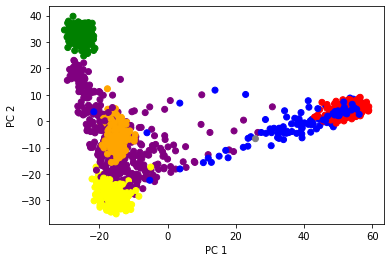

In [3]:
%pylab inline

import numpy as np
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Include the code you used here to compute and plot the first two genotype PCs.
# You may either run Python code directly in this cell,
# or you may write a custom script that you run in the terminal.
# Either way, be sure to point us to all of your relevant code here.
# and ensure that running this cell generates your PCA plot.

# Hints if you don't know where to start:
# - np.loadtxt function can be used to easily load a matrix of data. 
#      To test on a small number of SNPs, you can set max_rows=1000 to
#      quickly debug before running on the whole dataset
# - sklearn.decomposition.PCA https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#      Note: you might have to transpose your matrix before running
#      You'll be interested in pca.fit to compute the PCs
#      and pca.transform to project each sample onto the computed PCs
#
# More hints:
# - we've included some code below to create a dictionary mapping sample IDs to suggested colors
#   based on population groups. 

#######################################################################
####### Helper code: set up sample lists and color information #####
# Load population labels
sample_to_pop = {} # maps sample -> population code. e.g. sample_to_pop["NA12878"] = "CEU"
with open("ps2_reference_labels.csv", "r") as f:
    for line in f:
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

# Recommended colors for each population group
pop_to_color = {"None": "gray"}
for pop in ["ACB","ASW"]: pop_to_color[pop] = "blue" # Admixed African
for pop in ["GIH","BEB","ITU"]: pop_to_color[pop] = "orange" # South Asian
for pop in ["CDX","CHB","CHS","JPT","KHV"]: pop_to_color[pop] = "green" # East Asian
for pop in ["CEU","FIN","GBR","IBS","TSI"]: pop_to_color[pop] = "yellow" # European
for pop in ["CLM","MXL","PEL","PJL","PUR","STU"]: pop_to_color[pop] = "purple" # American
for pop in ["LWK","MSL","YRI","ESN","GWD"]: pop_to_color[pop] = "red" # African

# Load samples list and get colors
# Assumes you'll be using precomputed results in
# /datasets/cs284-sp21-A00-public/ps2/precomputed/
samples_file = "ps2_pca.samples.txt"
samples = [item.strip() for item in open(samples_file, "r").readlines()]
colors = []
for sample in samples:
    pop = sample_to_pop.get(sample, "None")
    color = pop_to_color[pop]
    colors.append(color)
#######################################################################
### Include your code to perform PCA and generate the scatter plot below

# YOUR CODE HERE
genome_matrix = np.load("genome_matrix.npy")
print(genome_matrix.shape)

file_name = f'PCA_comp_{2}' + '.npy'
#check path
if (os.path.isfile(file_name)):
    new_genome_matrix = np.load(file_name)
else:
    new_genome_matrix = generate_PCA(genome_matrix, 2, file_name)
print(new_genome_matrix.shape)
pc1 = new_genome_matrix[:,0]
pc2 = new_genome_matrix[:,1]

plt.scatter(pc1,pc2,c=colors)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
#raise NotImplementedError()

# TSNE

In [5]:
from sklearn.manifold import TSNE

def gen_TSNE(data, n_comp, perp, file_name):
    print("Generating TSNE...")
    tsne = TSNE(n_components=n_comp, perplexity=perp)
    tsne_matrix = tsne.fit_transform(data)
    print("Finished TSNE...")
    np.save(file_name, tsne_matrix)
    return tsne_matrix

(2504, 50)
Generating TSNE...
Finished TSNE...
(2504, 2)
Generating TSNE...
Finished TSNE...
(2504, 2)
Generating TSNE...
Finished TSNE...
(2504, 2)
Generating TSNE...
Finished TSNE...
(2504, 2)
Generating TSNE...
Finished TSNE...
(2504, 2)
Generating TSNE...
Finished TSNE...
(2504, 2)
Generating TSNE...
Finished TSNE...
(2504, 2)
Generating TSNE...
Finished TSNE...
(2504, 2)
Generating TSNE...
Finished TSNE...
(2504, 2)


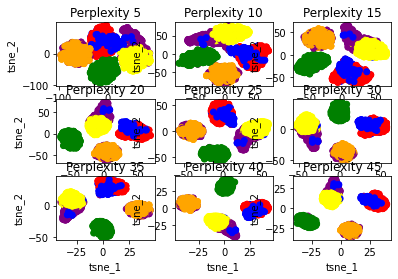

In [24]:
from sklearn.manifold import TSNE

n_comp = 50
PCA_file_name = f'PCA_comp_{n_comp}' + '.npy'
if (os.path.isfile(PCA_file_name)):
    new_genome_matrix = np.load(PCA_file_name)
else:
    new_genome_matrix = generate_PCA(genome_matrix, n_comp, PCA_file_name)
print(new_genome_matrix.shape)

number_of_graphs = 0
for k in np.arange(5,50,5):
    number_of_graphs += 1
    file_name = f'TSNE_comp_{2}_perp_{k}' + '.npy'
    #check path
    tsne_matrix = gen_TSNE(new_genome_matrix, 2, k, file_name)
    print(tsne_matrix.shape)
    tsne_1 = tsne_matrix[:,0]
    tsne_2 = tsne_matrix[:,1]
    plt.subplot(3, 3, number_of_graphs)
    plt.scatter(tsne_1,tsne_2, c=colors)
    plt.title(f"Perplexity {k}")
    plt.xlabel("tsne_1")
    plt.ylabel("tsne_2")

# UMAP

In [6]:
import umap

def fit_umap(data, file_name, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', override = False):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    if (os.path.isfile(file_name) and override == False):
        u = np.load(file_name)
    else:
        u = fit.fit_transform(data);
        np.save(file_name, u)
    return u

def draw_umap(data, colors, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    file_name = f'UMAP_comp_{n_components}_neigh_{n_neighbors}_dist_{min_dist}' + '.npy'
    print("Fitting UMAP...")
    u = fit_umap(data, file_name, n_neighbors, min_dist, n_components, metric)
    print("Finished UMAP...")
    
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=colors)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=colors)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=colors, s=100)
    plt.title(title, fontsize=18)

Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...


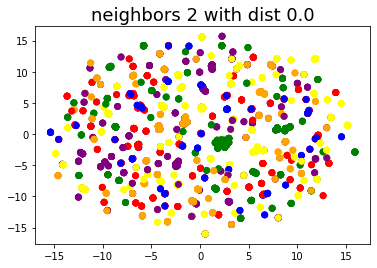

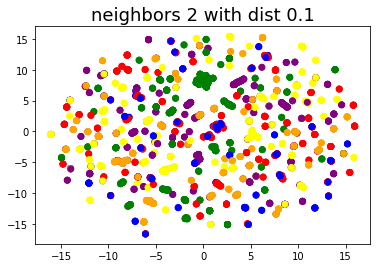

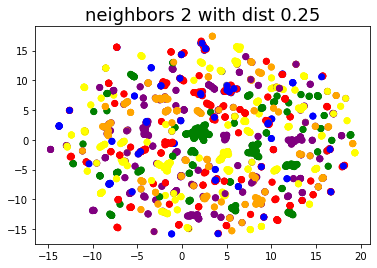

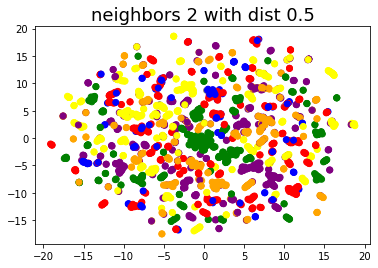

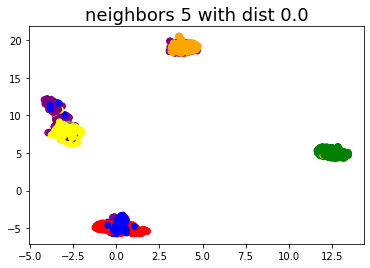

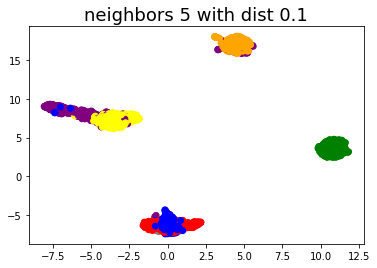

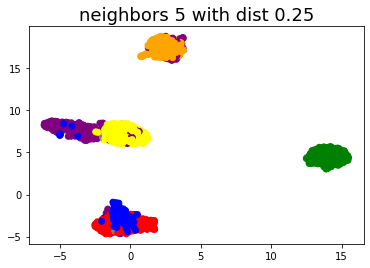

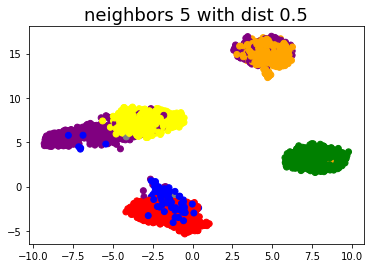

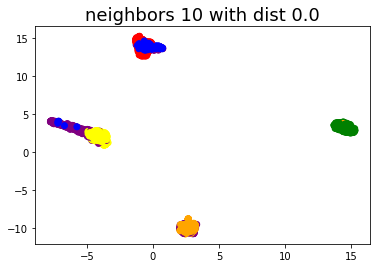

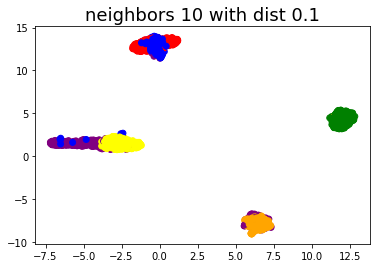

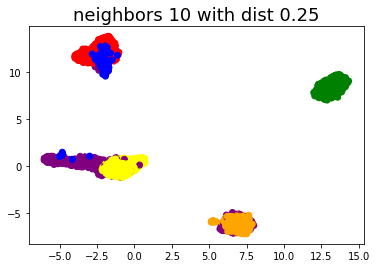

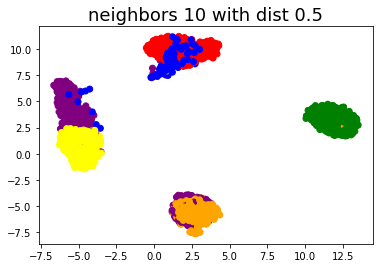

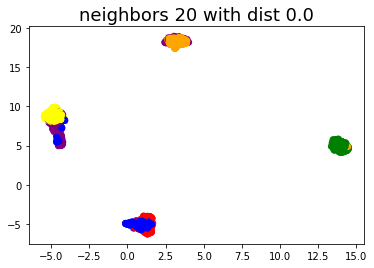

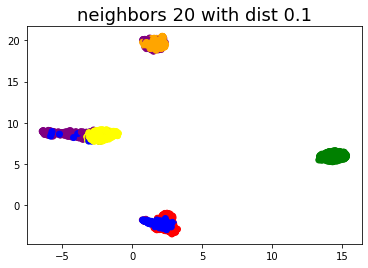

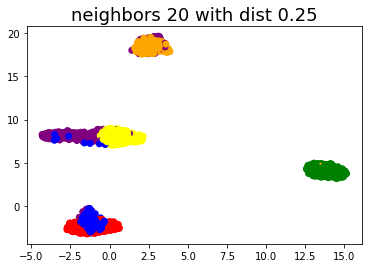

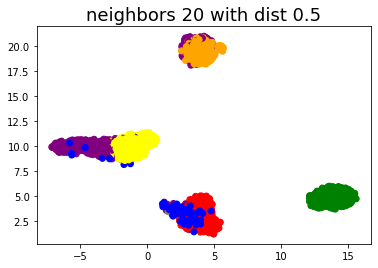

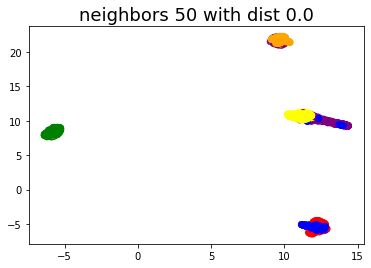

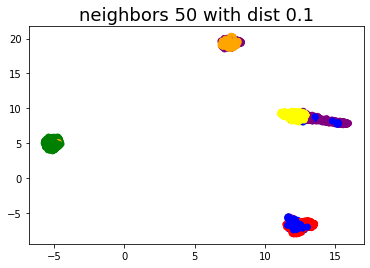

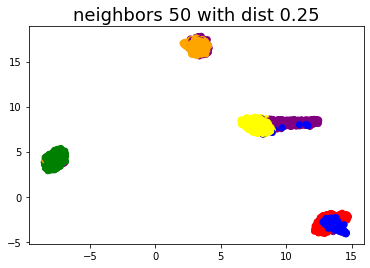

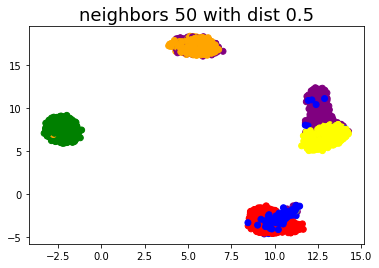

In [7]:
neigh_list = [2, 5, 10, 20, 50]
dist_list = [0.0, 0.1, 0.25, 0.5]

for n_neighbors in neigh_list:
    for min_dist in dist_list:
        title = f"neighbors {n_neighbors} with dist {min_dist}"
        draw_umap(genome_matrix, colors, n_neighbors, min_dist, title=title)

#### Based on the graphs above I can see that UMAP with neighbors being 5 has the best seperation between the major groups while keeping it fairly seperate within the clusters, will hopefully be easier for the machine learning algorithms to detect differences

Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...
Fitting UMAP...
Finished UMAP...


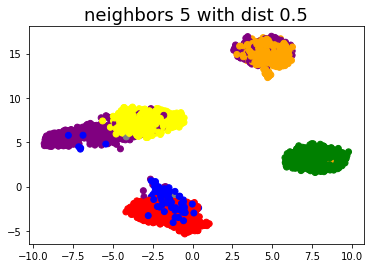

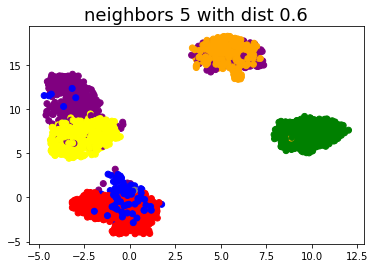

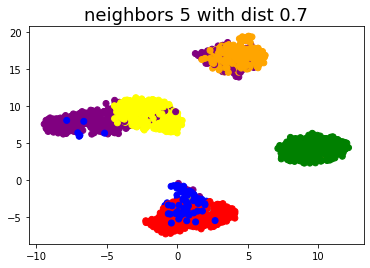

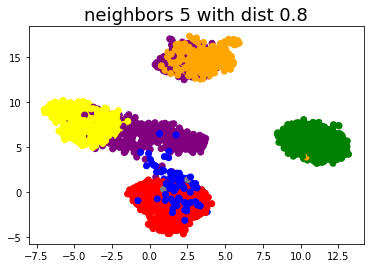

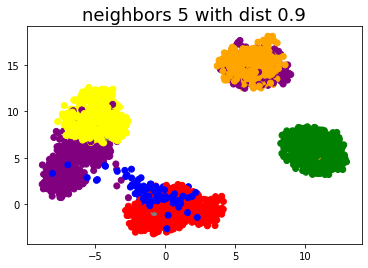

In [8]:
neigh_list = [5]
dist_list = [0.5, 0.6, 0.7, 0.8, 0.9]
for n_neighbors in neigh_list:
    for min_dist in dist_list:
        title = f"neighbors {n_neighbors} with dist {min_dist}"
        draw_umap(genome_matrix,colors, n_neighbors, min_dist, title=title)

#### I want to go with neighbors 5 with distance 0.6 as this provides the best seperation available.

# Prepping Data for ML

In [25]:
samples_file = "ps2_pca.samples.txt"
samples = [item.strip() for item in open(samples_file, "r").readlines()]
pop_dict = {}
remove_samples_idx = []

idx = 0
for sample in samples:
    pop = sample_to_pop.get(sample, "None")
    if pop == "None":
        remove_samples_idx.append(idx)
        continue
    if pop not in pop_dict:
        pop_dict[pop] = len(pop_dict)
    idx += 1
    
Y = []
for sample in samples:
    pop = sample_to_pop.get(sample, "None")
    if pop == "None":
        continue
    Y.append(pop_dict[pop])
    
print(len(pop_dict))
print(len(Y))
print(remove_samples_idx)
X = np.delete(genome_matrix, remove_samples_idx, 0)
print(X.shape)

Y_np = np.asarray(Y)
unique, counts = numpy.unique(Y_np, return_counts=True)
frequencies = numpy.asarray((unique, counts)).T
print(frequencies)

target_names = []
for pop in pop_dict:
    print(pop, pop_dict[pop])
    target_names.append(pop)

26
2501
[1668, 1901, 2187]
(2501, 28622)
[[  0  91]
 [  1  99]
 [  2 105]
 [  3 104]
 [  4  93]
 [  5  94]
 [  6 107]
 [  7  85]
 [  8  96]
 [  9  99]
 [ 10  96]
 [ 11 113]
 [ 12  99]
 [ 13  86]
 [ 14  85]
 [ 15 102]
 [ 16 102]
 [ 17  98]
 [ 18 107]
 [ 19 103]
 [ 20 104]
 [ 21  99]
 [ 22  60]
 [ 23  64]
 [ 24 107]
 [ 25 103]]
GBR 0
FIN 1
CHS 2
PUR 3
CDX 4
CLM 5
IBS 6
PEL 7
PJL 8
KHV 9
ACB 10
GWD 11
ESN 12
BEB 13
MSL 14
STU 15
ITU 16
CEU 17
YRI 18
CHB 19
JPT 20
LWK 21
ASW 22
MXL 23
TSI 24
GIH 25


# PCA for subpopulations

Generating PCA...
Finished PCA...
(2501, 2)


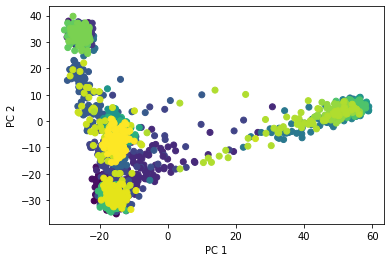

In [14]:
new_genome_matrix = generate_PCA(X, 2, 'temp.npy')
print(new_genome_matrix.shape)
pc1 = new_genome_matrix[:,0]
pc2 = new_genome_matrix[:,1]

plt.scatter(pc1,pc2,c=Y)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# TSNE for subpopulations

Generating PCA...
Finished PCA...
(2501, 50)
Generating TSNE...
Finished TSNE...
(2501, 2)


Text(0, 0.5, 'tsne_2')

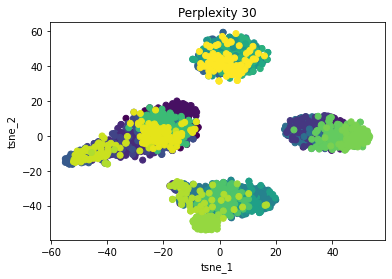

In [25]:
n_comp = 50
k = 30
new_genome_matrix = generate_PCA(X, n_comp, 'temp.npy')
print(new_genome_matrix.shape)
tsne_matrix = gen_TSNE(new_genome_matrix, 2, k, 'temp.npy')
print(tsne_matrix.shape)
tsne_1 = tsne_matrix[:,0]
tsne_2 = tsne_matrix[:,1]
plt.scatter(tsne_1,tsne_2, c=Y)
plt.title(f"Perplexity {k}")
plt.xlabel("tsne_1")
plt.ylabel("tsne_2")

# UMAP for subpopulations

Fitting UMAP...
Finished UMAP...


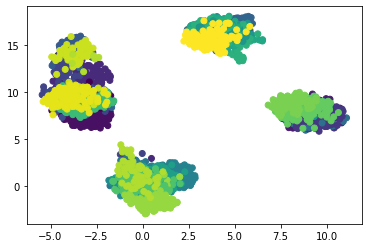

In [10]:
file_name = 'temp.npy'
data = X
n_neighbors = 5
min_dist = 0.6
n_components = 2
metric = 'euclidean'

print("Fitting UMAP...")
u = fit_umap(data, file_name, n_neighbors, min_dist, n_components, metric, True)
print("Finished UMAP...")

plt.scatter(u[:,0], u[:,1], c=Y)
plt.show()

# PCA + SVM

In [5]:
def train_and_test_SVM(X_train, X_test, Y_train, Y_test):
    Y_test = np.asarray(Y_test)
    clf = svm.SVC()
    clf.fit(X_train, Y_train)
    
    pred = clf.predict(X_test)
    pred = np.asarray(pred)
    assert(pred.shape == Y_test.shape)
    score_bool = pred == Y_test
    score = float(np.sum(score_bool)) /  float(len(score_bool))
    
    conf_matrix = confusion_matrix(Y_test, pred)
    return score, conf_matrix, pred

In [6]:
def generate_PCA_train_test(train_data, test_data, n, file_name_train, file_name_test):
    print("Generating PCA...")
    pca = PCA(n_components=n)
    pca.fit(train_data)
    new_train_data = pca.transform(train_data)
    new_test_data = pca.transform(test_data)
    print("Finished PCA...")
    np.save(file_name_train, new_train_data)
    np.save(file_name_test, new_test_data)
    return new_train_data, new_test_data

In [ ]:
PCA_Values = [2, 5, 10, 20, 50, 100, 200, 500, 1000]

rand_st = 1
genome_matrix = np.load("genome_matrix.npy")
X_genome_matrix = np.delete(genome_matrix, remove_samples_idx, 0)
X_genome_train, X_genome_test, Y_train, Y_test = train_test_split(X_genome_matrix, 
                                                                  Y, 
                                                                  test_size=0.20, 
                                                                  random_state=rand_st)

for PCA_val in PCA_Values:
    file_name_train = f'PCA_SVM/PCA_SVM_Train_Comp_{PCA_val}_Random_{rand_st}.npy'
    file_name_test = f'PCA_SVM/PCA_SVM_Test_Comp_{PCA_val}_Random_{rand_st}.npy'
    if (os.path.isfile(file_name_train) and os.path.isfile(file_name_test)):
        X_PCA_train = np.load(file_name_train)
        X_PCA_test = np.load(file_name_test)
    else:
        X_PCA_train, X_PCA_test = generate_PCA_train_test(X_genome_train, 
                                                          X_genome_test, 
                                                          PCA_val, 
                                                          file_name_train, 
                                                          file_name_test)
    score = train_and_test_SVM(X_PCA_train, X_PCA_test, Y_train, Y_test, target_names)
    print(f"Score of SVM on PCA with {PCA_val} components with random state {rand_st}: {score}")

# TSNE + SVM

In [ ]:
from sklearn.manifold import TSNE

TSNE_n_comps = [2, 3]
TSNE_perp = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
rand_st = 1
genome_matrix = np.load("genome_matrix.npy")
X_genome_matrix = np.delete(genome_matrix, remove_samples_idx, 0)

PCA_comp = 50
PCA_file_name = f'TSNE_SVM/PCA_comp_{PCA_comp}' + '.npy'
if (os.path.isfile(PCA_file_name)):
    X_genome_matrix = np.load(PCA_file_name)
else:
    X_genome_matrix = generate_PCA(X_genome_matrix, PCA_comp, PCA_file_name)

for n_comp in TSNE_n_comps:
    for perp in TSNE_perp:
        file_name = f'TSNE_SVM/TSNE_SVM_Comp_{n_comp}_Perp_{perp}_PCA_{PCA_comp}.npy'
        if (os.path.isfile(file_name)):
            TSNE_matrix = np.load(file_name)
        else:
            TSNE_matrix = gen_TSNE(X_genome_matrix, n_comp, perp, file_name)
        
        X_TSNE_train, X_TSNE_test, Y_train, Y_test = train_test_split(TSNE_matrix, 
                                                                      Y, 
                                                                      test_size = 0.2, 
                                                                      random_state = rand_st)
        score = train_and_test_SVM(X_TSNE_train, X_TSNE_test, Y_train, Y_test, target_names)
        print(f"Score of SVM on TSNE with {n_comp} components and {perp} perplexity trained on PCA {PCA_comp}: {score}")

# UMAP + SVM

In [7]:
def generate_UMAP_train_test(train_data, test_data, n_comp, n_neigh, min_dist, metric, file_name_train, file_name_test):
    print("Generating UMAP...")
    fit = umap.UMAP(
        n_neighbors=n_neigh,
        min_dist=min_dist,
        n_components=n_comp,
        metric=metric
    )
    new_train_data = fit.fit_transform(train_data)
    new_test_data = fit.transform(test_data)
    print("Finished UMAP...")
    np.save(file_name_train, new_train_data)
    np.save(file_name_test, new_test_data)
    return new_train_data, new_test_data

In [ ]:
n_comps = [2, 5, 10, 20, 50, 100]
neigh_list = [5, 10, 20]
dist_list = [0.4, 0.5, 0.6]

rand_st = 1
genome_matrix = np.load("genome_matrix.npy")
X_genome_matrix = np.delete(genome_matrix, remove_samples_idx, 0)
X_genome_train, X_genome_test, Y_train, Y_test = train_test_split(X_genome_matrix, 
                                                                  Y, 
                                                                  test_size=0.20, 
                                                                  random_state=rand_st)
for comp in n_comps:
    for neigh in neigh_list:
        for dist in dist_list:
            file_name_train = f'UMAP_SVM/UMAP_SVM_Train_Comp_{comp}_Neigh_{neigh}_Dist_{dist}_Random_{rand_st}.npy'
            file_name_test = f'UMAP_SVM/UMAP_SVM_Test_Comp_{comp}_Neigh_{neigh}_Dist_{dist}_Random_{rand_st}.npy'
            if (os.path.isfile(file_name_train) and os.path.isfile(file_name_test)):
                X_UMAP_train = np.load(file_name_train)
                X_UMAP_test = np.load(file_name_test)
            else:
                X_UMAP_train, X_UMAP_test = generate_UMAP_train_test(X_genome_train, 
                                         X_genome_test, 
                                         comp, 
                                         neigh, 
                                         dist, 
                                         'euclidean', 
                                         file_name_train, 
                                         file_name_test)
            
            score = train_and_test_SVM(X_UMAP_train, X_UMAP_test, Y_train, Y_test, target_names)
            print(f"Score of SVM on UMAP with {comp} components, {neigh} neighbors, and {dist} min distance with random state {rand_st}: {score}")

# Deep Learning

## Simple Linear Classification NN

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class Classification(nn.Module):
    def __init__(self, input_dim, output_dim, device):
        super().__init__()
        
        #print(input_dim)
        self.first_layer = nn.Linear(input_dim, 2000).to(device)
        self.second_layer = nn.Linear(2000, 3000).to(device)
        self.third_layer = nn.Linear(3000, 5000).to(device)
        self.fourth_layer = nn.Linear(5000, 1000).to(device)
        self.fifth_layer = nn.Linear(1000, 500).to(device)
        self.sixth_layer = nn.Linear(500, 100).to(device)
        self.seventh_layer = nn.Linear(100, 50).to(device)
        self.final_layer = nn.Linear(50, output_dim).to(device)
        
        self.dropout = nn.Dropout(0.05)
        
    
    def forward(self, x):
        
        #print(x.shape)
        output = F.relu(self.first_layer(x))
        output = self.dropout(output)
        
        output = F.relu(self.second_layer(output))

        
        output = F.relu(self.third_layer(output))

        
        output = F.relu(self.fourth_layer(output))
        
        output = F.relu(self.fifth_layer(output))
        
        output = F.relu(self.sixth_layer(output))
        
        output = F.relu(self.seventh_layer(output))

        
        final_output = self.final_layer(output)
        
        return final_output

In [27]:
def init_weights(m):
    for name, param in m.named_parameters():
        if 'weight' in name:
            nn.init.normal_(param.data, mean=0, std=0.01)
        else:
            nn.init.constant_(param.data, 0)

In [28]:
from sklearn.model_selection import train_test_split

genome_matrix = np.load("genome_matrix.npy")
X_genome_matrix = np.delete(genome_matrix, remove_samples_idx, 0)
X_genome_train, X_genome_test, Y_train, Y_test = train_test_split(X_genome_matrix, 
                                                                  Y, 
                                                                  test_size=0.20, 
                                                                  random_state=SEED)

BATCH_SIZE = 100
EPOCHS = 300

X_genome_train = np.asarray(X_genome_train)
Y_train = np.asarray(Y_train)

X_genome_test = np.asarray(X_genome_test)
Y_test = np.asarray(Y_test)

Y_len = len(np.unique(Y_train))
print(Y_len)

model = Classification(X_genome_train.shape[1], Y_len, device)            
model.apply(init_weights)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

26


## Training

In [29]:
def train(model, x_train_data, y_train_data, batch_size, optimizer, criterion):
    model.train()
    
    epoch_loss = 0
    permutation = torch.randperm(x_train_data.shape[0])
    counter = 0
    
    for i in range(0, x_train_data.shape[0], batch_size):
        optimizer.zero_grad()
        
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = torch.from_numpy(x_train_data[indices]).to(device), torch.from_numpy(y_train_data[indices]).to(device)
        outputs = model(batch_x.float())
        loss = criterion(outputs, batch_y.long())
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        counter +=  1
    
    return epoch_loss / counter

In [9]:
accuracy_list = []
for epoch in range(EPOCHS):
    epoch_loss = train(model, X_genome_train, Y_train, BATCH_SIZE, optimizer, criterion)
    if epoch % 10 == 0:
        print(f"Epoch {epoch} Loss: {epoch_loss}")
    
    with torch.no_grad():
        torch_x = torch.from_numpy(X_genome_test).to(device).float()
        output = model(torch_x)
        predicted = torch.argmax(output, dim=1)
        assert predicted.shape == Y_test.shape

        accuracy = 0.0
        total = 0
        for i in range(len(predicted)):
            if predicted[i] == Y_test[i]:
                accuracy += 1
            total += 1
        accuracy_list.append(accuracy / total)

accuracy_np = np.asarray(accuracy_list)
print(np.amax(accuracy_np))

Epoch 0 Loss: 3.276107168197632
Epoch 10 Loss: 2.2742849230766295
Epoch 20 Loss: 2.175901460647583
Epoch 30 Loss: 2.078448456525803
Epoch 40 Loss: 1.9916825771331788
Epoch 50 Loss: 1.7267554879188538
Epoch 60 Loss: 1.3862656354904175
Epoch 70 Loss: 1.0508402705192565
Epoch 80 Loss: 0.7899454146623611
Epoch 90 Loss: 0.7400197505950927
Epoch 100 Loss: 0.35164121314883234
Epoch 110 Loss: 0.2880054861307144
Epoch 120 Loss: 0.16686007119715213
Epoch 130 Loss: 0.3112742729485035
Epoch 140 Loss: 0.14287883080542088
Epoch 150 Loss: 0.30221561938524244
Epoch 160 Loss: 0.4824846513569355
Epoch 170 Loss: 0.13919631857424974
Epoch 180 Loss: 0.19534025005996228
Epoch 190 Loss: 0.12318258807063102
Epoch 200 Loss: 0.14918709844350814
Epoch 210 Loss: 0.0840555539354682
Epoch 220 Loss: 0.15490865465253592
Epoch 230 Loss: 0.11296347323805093
Epoch 240 Loss: 0.0854701470118016
Epoch 250 Loss: 0.17019941927865148
Epoch 260 Loss: 0.3143428417854011
Epoch 270 Loss: 0.23541409261524676
Epoch 280 Loss: 0.1176

## Prediction

# PCA with NN

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

SEED = 1234

# random.seed(SEED)
# np.random.seed(SEED)
# torch.manual_seed(SEED)
# torch.cuda.manual_seed(SEED)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class ClassificationPCA(nn.Module):
    def __init__(self, input_dim, output_dim, device):
        super().__init__()

        #print(input_dim)
        self.first_layer = nn.Linear(input_dim, 2000).to(device)
        self.second_layer = nn.Linear(2000, 3000).to(device)
        self.third_layer = nn.Linear(3000, 5000).to(device)
        self.fourth_layer = nn.Linear(5000, 1000).to(device)
        self.fifth_layer = nn.Linear(1000, 500).to(device)
        self.sixth_layer = nn.Linear(500, 100).to(device)
        self.seventh_layer = nn.Linear(100, 50).to(device)
        self.final_layer = nn.Linear(50, output_dim).to(device)

        self.dropout = nn.Dropout(0.10)
        
    
    def forward(self, x):
        
        #print(x.shape)
        output = F.relu(self.first_layer(x))
        output = self.dropout(output)
        
        output = F.relu(self.second_layer(output))

        
        output = F.relu(self.third_layer(output))

        
        output = F.relu(self.fourth_layer(output))
        
        output = F.relu(self.fifth_layer(output))
        
        output = F.relu(self.sixth_layer(output))
        
        output = F.relu(self.seventh_layer(output))

        
        final_output = self.final_layer(output)
        
        return final_output

In [31]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

iteration = 20

#PCA_val = 10

PCA_list_val = [2, 10, 50, 100, 500, 1000, 2000]
PCA_scores = []
NN_scores = []
SVM_reports = []
NN_reports = []

PCA_matrix = []
NN_matrix = []
errors_list = []


for PCA_val in PCA_list_val:
    print("------PCA_VAL-------")
    avg_score_SVM = 0.0
    avg_score_NN = 0.0
    
    SVM_Confusion = None
    NN_Confusion = None
    
    total_SVM_pred = None
    total_NN_pred = None
    total_target = None
    
    best_itr_acc = 0.0
    best_errors = None

    for i in range(iteration):
        genome_matrix = np.load("genome_matrix.npy")
        X_genome_matrix = np.delete(genome_matrix, remove_samples_idx, 0)
        
        Y_train_unique = 0
        Y_test_unique = 0
        
        while(Y_train_unique != len(np.unique(Y)) or Y_test_unique != len(np.unique(Y))):
            X_genome_train, X_genome_test, Y_train, Y_test = train_test_split(X_genome_matrix, 
                                                                          Y, 
                                                                          test_size=0.10)
            Y_train_unique = len(numpy.unique(Y_train))
            Y_test_unique = len(numpy.unique(Y_test))
        

        file_name_train = f'PCA_SVM/PCA_SVM_Train_Comp_{PCA_val}_Random_{SEED}.npy'
        file_name_test = f'PCA_SVM/PCA_SVM_Test_Comp_{PCA_val}_Random_{SEED}.npy'

        X_PCA_train, X_PCA_test = generate_PCA_train_test(X_genome_train, 
                                                          X_genome_test, 
                                                          PCA_val, 
                                                          file_name_train, 
                                                          file_name_test)

        score_SVM, c_matrix, SVM_pred = train_and_test_SVM(X_PCA_train, X_PCA_test, Y_train, Y_test)
        avg_score_SVM += score_SVM
        
        if SVM_Confusion is None:
            SVM_Confusion = c_matrix
        else:
            SVM_Confusion += c_matrix

        BATCH_SIZE = 200
        EPOCHS = 70

        Y_train = np.asarray(Y_train)

        Y_test = np.asarray(Y_test)

        Y_len = len(numpy.unique(Y_train))
        #print(Y_len)

        model = ClassificationPCA(X_PCA_train.shape[1], Y_len, device)            
        model.apply(init_weights)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters())

        best_accuracy = 0.0
        best_matrix = None
        best_NN_pred = None
        for epoch in range(EPOCHS):
            errors = []
            epoch_loss = train(model, X_PCA_train, Y_train, BATCH_SIZE, optimizer, criterion)
            if epoch % 10 == 0:
                #print(f"Epoch {epoch} Loss: {epoch_loss}")
                pass

            with torch.no_grad():
                torch_x = torch.from_numpy(X_PCA_test).to(device).float()
                output = model(torch_x)
                prob_output = F.softmax(output, dim=1)
                predicted = torch.argmax(output, dim=1)
                assert predicted.shape == Y_test.shape

                accuracy = 0.0
                total = 0
                for i in range(len(predicted)):
                    if predicted[i] == Y_test[i]:
                        accuracy += 1
                    else:
                        errors.append((predicted[i], Y_test[i], prob_output[i]))
                    total += 1
                current_accuracy = accuracy / total
                if current_accuracy > best_accuracy:
                    best_accuracy = current_accuracy
                    best_matrix = confusion_matrix(Y_test, predicted.cpu().detach().numpy())
                    best_NN_pred = predicted.cpu().detach().numpy()
                    
                if current_accuracy > best_itr_acc:
                    best_errors = errors

        avg_score_NN += best_accuracy
        if NN_Confusion is None:
            NN_Confusion = best_matrix
        else:
            NN_Confusion += best_matrix
            
        if total_SVM_pred is None:
            total_SVM_pred = SVM_pred
        else:
            total_SVM_pred = np.concatenate((total_SVM_pred, SVM_pred), axis=None)
            
        if total_NN_pred is None:
            total_NN_pred = best_NN_pred
        else:
            total_NN_pred = np.concatenate((total_NN_pred, best_NN_pred), axis=None)
        
        if total_target is None:
            total_target = Y_test
        else:
            total_target = np.concatenate((total_target, Y_test), axis=None)

    PCA_scores.append(avg_score_SVM / iteration)
    NN_scores.append(avg_score_NN / iteration)
    
    PCA_matrix.append(SVM_Confusion)
    NN_matrix.append(NN_Confusion)
     
    SVM_reports.append(classification_report(total_target, total_SVM_pred, target_names=target_names))
    NN_reports.append(classification_report(total_target, total_NN_pred, target_names=target_names))
    errors_list.append(best_errors)

------PCA_VAL-------
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

------PCA_VAL-------
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
------PCA_VAL-------
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Genera

In [32]:
for pop in pop_dict:
    print(pop, pop_dict[pop])

GBR 0
FIN 1
CHS 2
PUR 3
CDX 4
CLM 5
IBS 6
PEL 7
PJL 8
KHV 9
ACB 10
GWD 11
ESN 12
BEB 13
MSL 14
STU 15
ITU 16
CEU 17
YRI 18
CHB 19
JPT 20
LWK 21
ASW 22
MXL 23
TSI 24
GIH 25


When PCA components is 2
Average score of SVM: 0.2852589641434262
Average score of NN: 0.29621513944223105


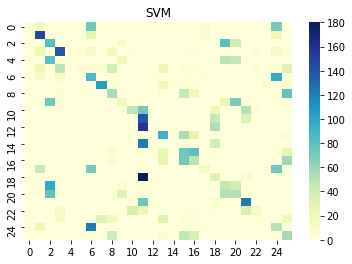

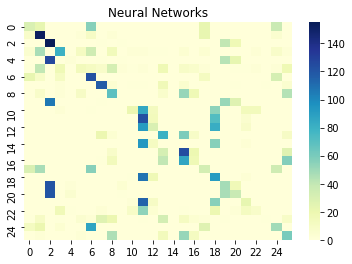

-----------------------
When PCA components is 10
Average score of SVM: 0.49621513944223106
Average score of NN: 0.4641434262948206


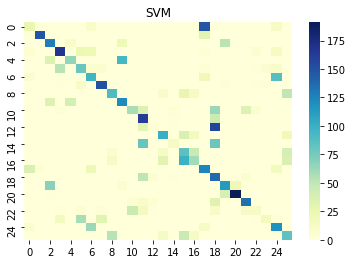

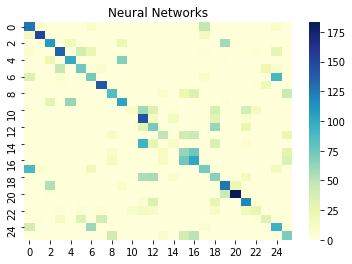

-----------------------
When PCA components is 50
Average score of SVM: 0.5669322709163347
Average score of NN: 0.5047808764940239


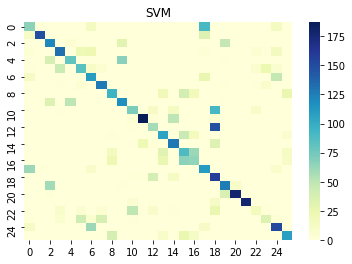

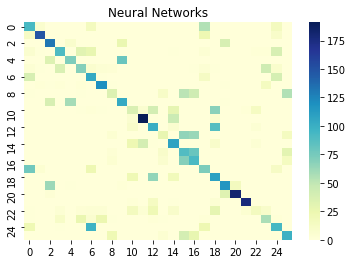

-----------------------
When PCA components is 100
Average score of SVM: 0.599203187250996
Average score of NN: 0.5330677290836654


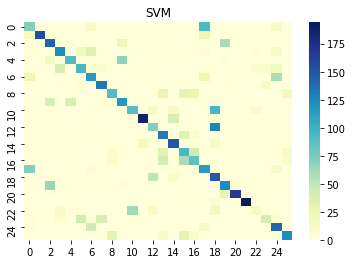

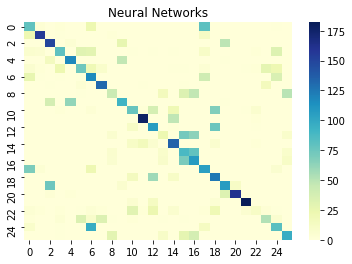

-----------------------
When PCA components is 500
Average score of SVM: 0.647011952191235
Average score of NN: 0.5338645418326695


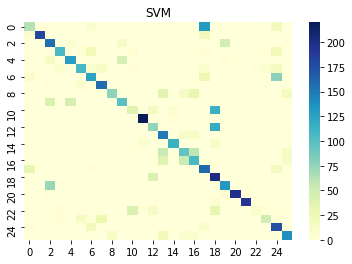

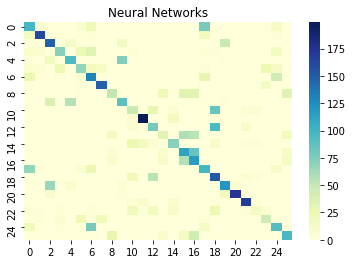

-----------------------
When PCA components is 1000
Average score of SVM: 0.6509960159362549
Average score of NN: 0.5099601593625498


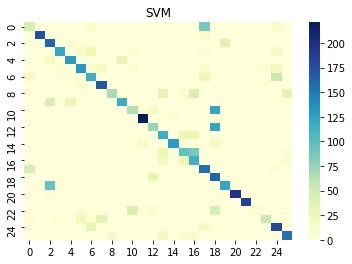

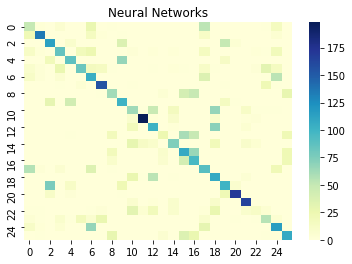

-----------------------
When PCA components is 2000
Average score of SVM: 0.6402390438247012
Average score of NN: 0.4760956175298804


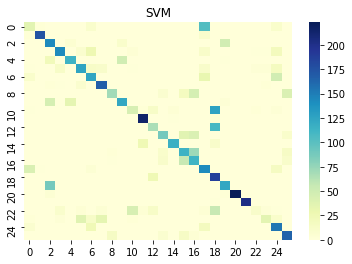

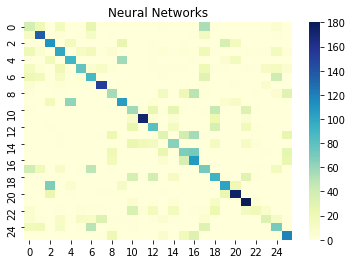

-----------------------


In [36]:
for i in range(len(PCA_list_val)):
    print(f"When PCA components is {PCA_list_val[i]}")
    print(f'Average score of SVM: {PCA_scores[i]}')
    print(f'Average score of NN: {NN_scores[i]}')
    sns.heatmap(PCA_matrix[i], cmap="YlGnBu")
    plt.title("SVM")
    plt.show()
    sns.heatmap(NN_matrix[i], cmap="YlGnBu")
    plt.title("Neural Networks")
    plt.show()
    print('-----------------------')

In [34]:
for i in range(len(PCA_list_val)):
    print(f"When PCA components is {PCA_list_val[i]}")
    print("-------SVM-------")
    print(SVM_reports[i])
    print("-------NN-------")
    print(NN_reports[i])
    print('-----------------------')

When PCA components is 2
-------SVM-------
              precision    recall  f1-score   support

         GBR       0.40      0.01      0.02       168
         FIN       0.52      0.72      0.61       203
         CHS       0.20      0.38      0.26       214
         PUR       0.59      0.63      0.61       220
         CDX       0.00      0.00      0.00       196
         CLM       0.29      0.03      0.05       188
         IBS       0.22      0.42      0.29       208
         PEL       0.73      0.69      0.71       154
         PJL       0.30      0.26      0.28       209
         KHV       0.21      0.10      0.13       185
         ACB       0.56      0.24      0.33       204
         GWD       0.18      0.65      0.28       215
         ESN       0.00      0.00      0.00       212
         BEB       0.41      0.51      0.45       182
         MSL       0.00      0.00      0.00       163
         STU       0.24      0.35      0.29       210
         ITU       0.22      0.23     

In [35]:
for i in range(len(PCA_list_val)):
    print(f"When PCA components is {PCA_list_val[i]} ---------------------------")
    for j in range(10):
        error = errors_list[i][j]
        print(f"Predicted {error[0]}")
        print(f"Actual: {error[1]}")
        print(f"Probabilities: {error[2]}")

When PCA components is 2 ---------------------------
Predicted 12
Actual: 14
Probabilities: tensor([1.5004e-12, 5.2166e-17, 1.8117e-09, 3.1605e-07, 7.3214e-11, 4.3058e-07,
        4.1813e-10, 1.3712e-06, 2.5562e-18, 1.6614e-10, 3.9392e-02, 2.2049e-01,
        3.4529e-01, 1.5631e-17, 1.4765e-01, 1.8417e-19, 2.0041e-18, 2.3868e-14,
        1.5694e-01, 4.8952e-10, 4.9506e-10, 8.1078e-02, 9.1619e-03, 5.9599e-08,
        6.9738e-12, 6.5183e-19], device='cuda:0')
Predicted 8
Actual: 16
Probabilities: tensor([3.5939e-05, 1.0201e-03, 3.0477e-08, 6.2781e-02, 1.3190e-08, 1.7141e-01,
        4.2464e-06, 1.1171e-02, 2.9004e-01, 1.0966e-07, 4.3180e-05, 2.5061e-07,
        4.0563e-07, 5.7005e-03, 5.6058e-07, 5.5823e-02, 5.6327e-02, 6.2040e-05,
        3.2827e-07, 2.6830e-07, 1.6248e-07, 1.1409e-06, 3.1876e-04, 8.4764e-02,
        1.0623e-04, 2.6039e-01], device='cuda:0')
Predicted 24
Actual: 6
Probabilities: tensor([2.4774e-01, 1.7031e-02, 2.5118e-14, 1.8286e-02, 1.6573e-15, 9.3185e-03,
        2.53

Predicted 8
Actual: 13
Probabilities: tensor([1.0701e-14, 5.8994e-13, 2.3928e-24, 1.7185e-11, 4.6221e-14, 2.8043e-06,
        1.4100e-15, 1.0420e-07, 9.7602e-01, 1.2947e-15, 4.5342e-22, 3.2992e-24,
        3.7989e-17, 2.9021e-03, 1.6790e-27, 2.1077e-02, 4.9171e-08, 6.7676e-11,
        7.7076e-26, 5.1538e-27, 2.2328e-21, 7.5817e-27, 3.7912e-13, 3.7052e-10,
        3.3704e-12, 4.1579e-10], device='cuda:0')
Predicted 20
Actual: 9
Probabilities: tensor([0.0000e+00, 0.0000e+00, 1.9778e-05, 0.0000e+00, 1.6025e-07, 0.0000e+00,
        0.0000e+00, 1.1951e-30, 0.0000e+00, 9.7821e-19, 5.6992e-10, 0.0000e+00,
        8.6855e-02, 1.9998e-22, 6.2887e-19, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        7.6341e-26, 3.1242e-11, 9.1312e-01, 4.3919e-40, 6.5419e-19, 6.0440e-25,
        0.0000e+00, 0.0000e+00], device='cuda:0')
Predicted 14
Actual: 18
Probabilities: tensor([0.0000e+00, 0.0000e+00, 1.0657e-14, 0.0000e+00, 2.6181e-14, 0.0000e+00,
        0.0000e+00, 1.1770e-33, 0.0000e+00, 3.1492e-18, 3.2540e-0

In [ ]:
os.system("rundll32.exe powrprof.dll,SetSuspendState 0,1,0")

# UMAP w/ NN

In [60]:
%%time

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

iteration = 5

#PCA_val = 10

n_comps = [2, 10, 50, 100]
neigh_list = [5, 10, 20]
dist_list = [0.4, 0.5, 0.6]
UMAP_scores = []
NN_scores = []

SVM_reports = []
NN_reports = []

UMAP_matrix = []
NN_matrix = []

SEED = 1234


for n in n_comps:
    for neigh in neigh_list:
        for min_dist in dist_list:
            
            avg_score_SVM = 0.0
            avg_score_NN = 0.0

            SVM_Confusion = None
            NN_Confusion = None
            
            total_SVM_pred = None
            total_NN_pred = None
            total_target = None

            for i in range(iteration):
                genome_matrix = np.load("genome_matrix.npy")
                X_genome_matrix = np.delete(genome_matrix, remove_samples_idx, 0)
                
                
                Y_train_unique = 0
                Y_test_unique = 0
                
                while(Y_train_unique != len(np.unique(Y)) or Y_test_unique != len(np.unique(Y))):
                    X_genome_train, X_genome_test, Y_train, Y_test = train_test_split(X_genome_matrix, 
                                                                                  Y, 
                                                                                  test_size=0.10)
                    Y_train_unique = len(numpy.unique(Y_train))
                    Y_test_unique = len(numpy.unique(Y_test))

                file_name_train = f'UMAP_SVM/UMAP_SVM_Train_Comp_{n}_Neigh_{neigh}_Dist_{min_dist}_Random_{SEED}.npy'
                file_name_test = f'UMAP_SVM/UMAP_SVM_Test_Comp_{n}_Neigh_{neigh}_Dist_{min_dist}_Random_{SEED}.npy'
                
                
                X_UMAP_train, X_UMAP_test = generate_UMAP_train_test(X_genome_train, 
                                         X_genome_test, 
                                         n, 
                                         neigh, 
                                         min_dist, 
                                         'euclidean', 
                                         file_name_train, 
                                         file_name_test)

                score_SVM, c_matrix, SVM_pred = train_and_test_SVM(X_UMAP_train, X_UMAP_test, Y_train, Y_test)
                avg_score_SVM += score_SVM

                if SVM_Confusion is None:
                    SVM_Confusion = c_matrix
                else:
                    SVM_Confusion += c_matrix

                BATCH_SIZE = 200
                EPOCHS = 70

                Y_train = np.asarray(Y_train)

                Y_test = np.asarray(Y_test)

                Y_len = len(numpy.unique(Y_train))
                #print(Y_len)

                model = ClassificationPCA(X_UMAP_train.shape[1], Y_len, device)            
                model.apply(init_weights)
                criterion = nn.CrossEntropyLoss()
                optimizer = optim.Adam(model.parameters())

                best_accuracy = 0.0
                best_matrix = None
                best_NN_pred = None
                for epoch in range(EPOCHS):
                    epoch_loss = train(model, X_UMAP_train, Y_train, BATCH_SIZE, optimizer, criterion)
                    if epoch % 10 == 0:
                        #print(f"Epoch {epoch} Loss: {epoch_loss}")
                        pass

                    with torch.no_grad():
                        torch_x = torch.from_numpy(X_UMAP_test).to(device).float()
                        output = model(torch_x)
                        predicted = torch.argmax(output, dim=1)
                        assert predicted.shape == Y_test.shape

                        accuracy = 0.0
                        total = 0
                        for i in range(len(predicted)):
                            if predicted[i] == Y_test[i]:
                                accuracy += 1
                            total += 1
                        current_accuracy = accuracy / total
                        if current_accuracy > best_accuracy:
                            best_accuracy = current_accuracy
                            best_matrix = confusion_matrix(Y_test, predicted.cpu().detach().numpy())
                            best_NN_pred = predicted.cpu().detach().numpy()

                avg_score_NN += best_accuracy
#                 print(best_accuracy)
#                 print(score_SVM)
                if NN_Confusion is None:
                    NN_Confusion = best_matrix
                else:
                    NN_Confusion += best_matrix

                if total_SVM_pred is None:
                    total_SVM_pred = SVM_pred
                else:
                    total_SVM_pred = np.concatenate((total_SVM_pred, SVM_pred), axis=None)

                if total_NN_pred is None:
                    total_NN_pred = best_NN_pred
                else:
                    total_NN_pred = np.concatenate((total_NN_pred, best_NN_pred), axis=None)

                if total_target is None:
                    total_target = Y_test
                else:
                    total_target = np.concatenate((total_target, Y_test), axis=None)
    
            UMAP_scores.append(avg_score_SVM / iteration)
            NN_scores.append(avg_score_NN / iteration)

            UMAP_matrix.append(SVM_Confusion)
            NN_matrix.append(NN_Confusion)
            
            SVM_reports.append(classification_report(total_target, total_SVM_pred, target_names=target_names))
            NN_reports.append(classification_report(total_target, total_NN_pred, target_names=target_names))

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Wall time: 4h 57min 42s


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

When UMAP components is 2, neighbors is 5, and min distance is 0.4
Average score of SVM: 0.4334661354581673
Average score of NN: 0.4247011952191235


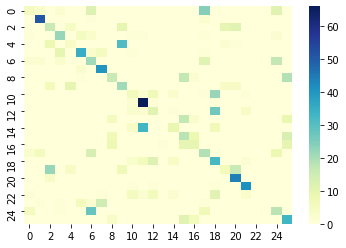

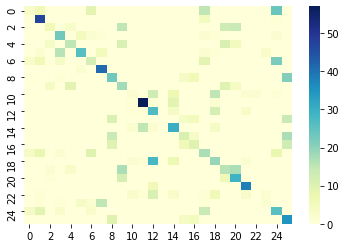

-----------------------
When UMAP components is 2, neighbors is 5, and min distance is 0.5
Average score of SVM: 0.4191235059760956
Average score of NN: 0.37928286852589643


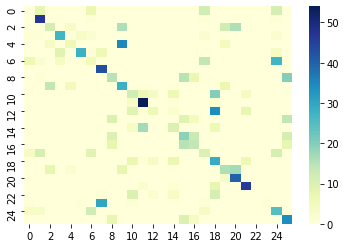

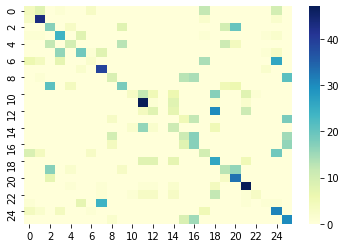

-----------------------
When UMAP components is 2, neighbors is 5, and min distance is 0.6
Average score of SVM: 0.4334661354581673
Average score of NN: 0.40717131474103585


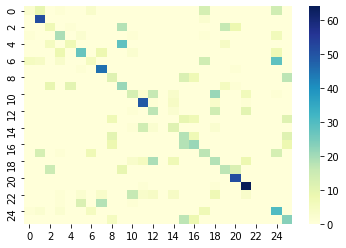

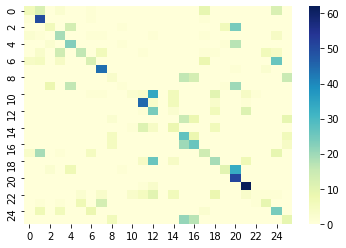

-----------------------
When UMAP components is 2, neighbors is 10, and min distance is 0.4
Average score of SVM: 0.4326693227091633
Average score of NN: 0.34023904382470116


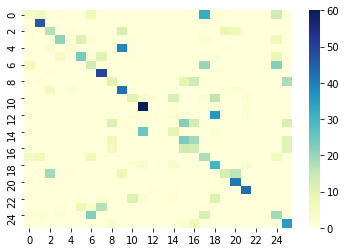

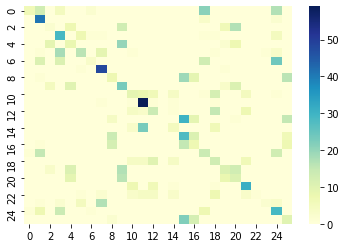

-----------------------
When UMAP components is 2, neighbors is 10, and min distance is 0.5
Average score of SVM: 0.4223107569721115
Average score of NN: 0.3402390438247012


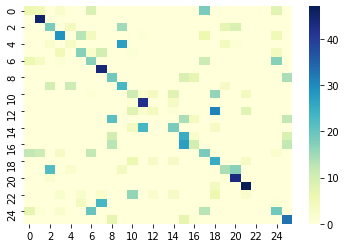

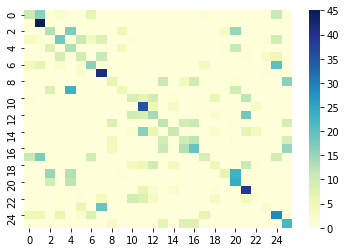

-----------------------
When UMAP components is 2, neighbors is 10, and min distance is 0.6
Average score of SVM: 0.446215139442231
Average score of NN: 0.3912350597609562


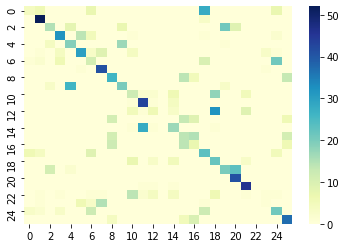

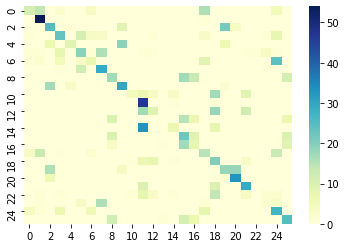

-----------------------
When UMAP components is 2, neighbors is 20, and min distance is 0.4
Average score of SVM: 0.42788844621513944
Average score of NN: 0.3713147410358566


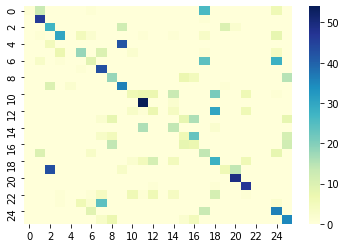

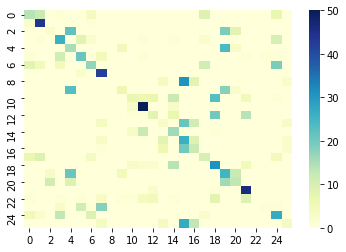

-----------------------
When UMAP components is 2, neighbors is 20, and min distance is 0.5
Average score of SVM: 0.44541832669322706
Average score of NN: 0.4047808764940239


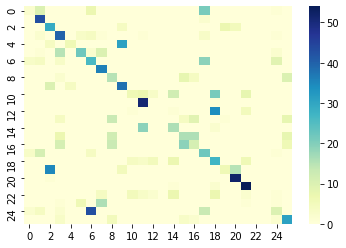

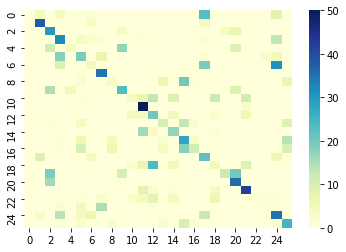

-----------------------
When UMAP components is 2, neighbors is 20, and min distance is 0.6
Average score of SVM: 0.4589641434262949
Average score of NN: 0.42071713147410356


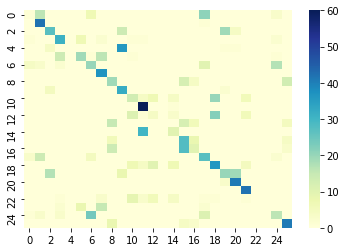

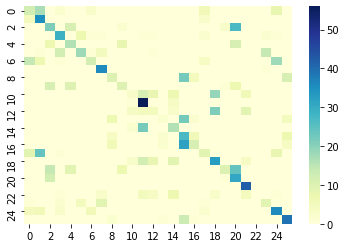

-----------------------
When UMAP components is 10, neighbors is 5, and min distance is 0.4
Average score of SVM: 0.398406374501992
Average score of NN: 0.3051792828685259


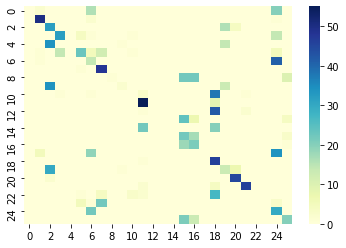

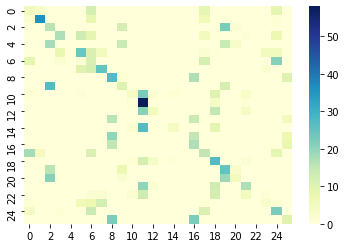

-----------------------
When UMAP components is 10, neighbors is 5, and min distance is 0.5
Average score of SVM: 0.3912350597609562
Average score of NN: 0.2725099601593626


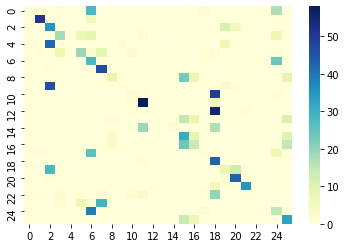

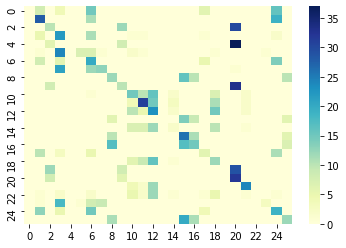

-----------------------
When UMAP components is 10, neighbors is 5, and min distance is 0.6
Average score of SVM: 0.4294820717131474
Average score of NN: 0.33625498007968135


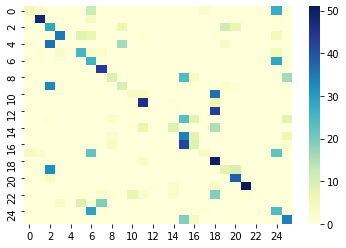

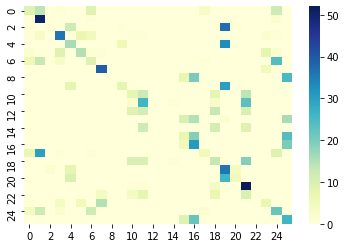

-----------------------
When UMAP components is 10, neighbors is 10, and min distance is 0.4
Average score of SVM: 0.38087649402390433
Average score of NN: 0.301195219123506


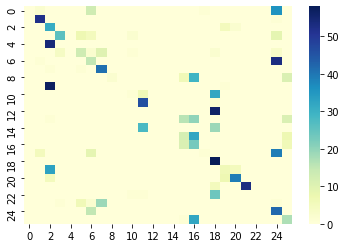

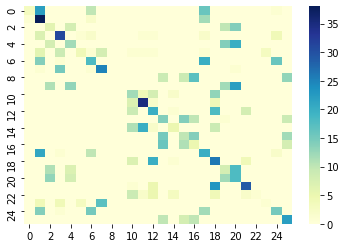

-----------------------
When UMAP components is 10, neighbors is 10, and min distance is 0.5
Average score of SVM: 0.4
Average score of NN: 0.24860557768924302


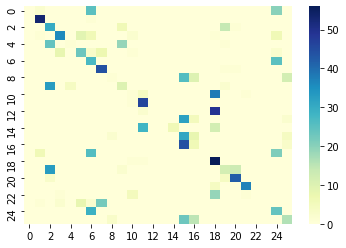

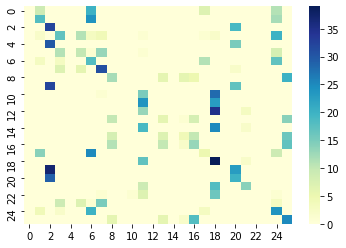

-----------------------
When UMAP components is 10, neighbors is 10, and min distance is 0.6
Average score of SVM: 0.40796812749003986
Average score of NN: 0.31952191235059757


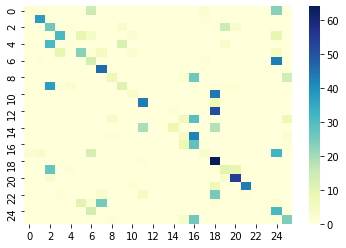

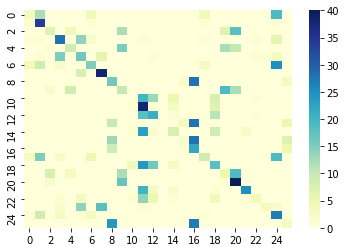

-----------------------
When UMAP components is 10, neighbors is 20, and min distance is 0.4
Average score of SVM: 0.347410358565737
Average score of NN: 0.3083665338645418


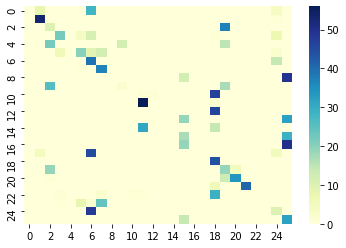

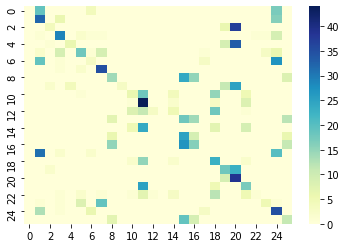

-----------------------
When UMAP components is 10, neighbors is 20, and min distance is 0.5
Average score of SVM: 0.3649402390438247
Average score of NN: 0.31633466135458166


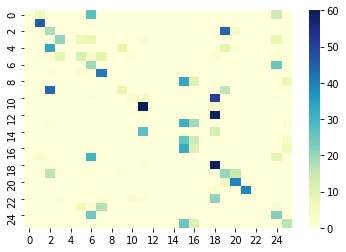

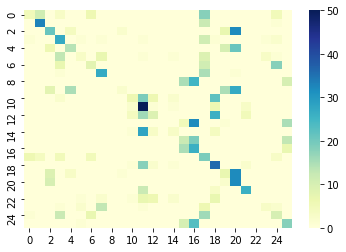

-----------------------
When UMAP components is 10, neighbors is 20, and min distance is 0.6
Average score of SVM: 0.39282868525896414
Average score of NN: 0.3904382470119522


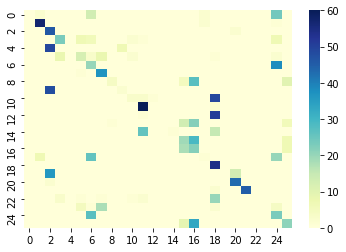

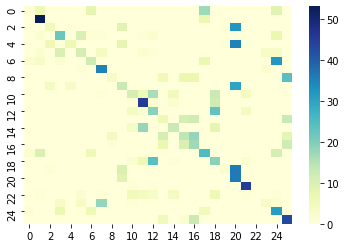

-----------------------
When UMAP components is 50, neighbors is 5, and min distance is 0.4
Average score of SVM: 0.28286852589641437
Average score of NN: 0.24701195219123506


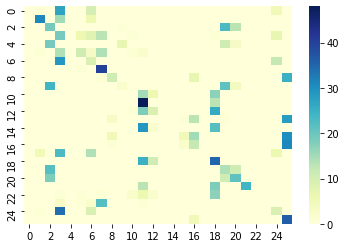

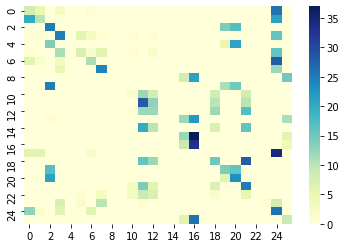

-----------------------
When UMAP components is 50, neighbors is 5, and min distance is 0.5
Average score of SVM: 0.3187250996015937
Average score of NN: 0.23187250996015937


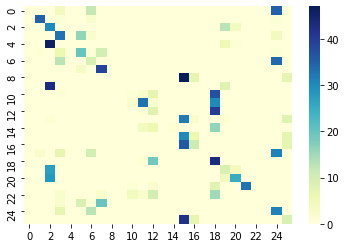

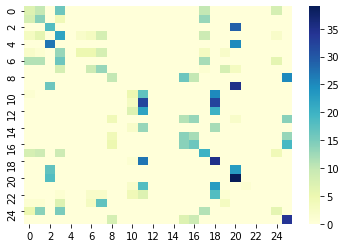

-----------------------
When UMAP components is 50, neighbors is 5, and min distance is 0.6
Average score of SVM: 0.34581673306772903
Average score of NN: 0.2398406374501992


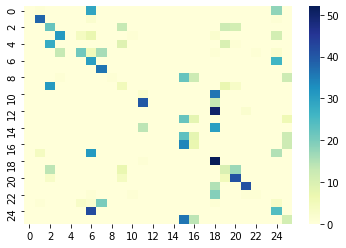

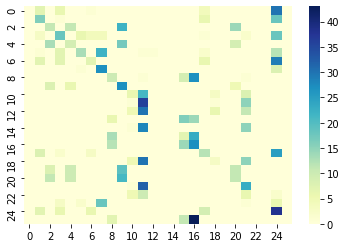

-----------------------
When UMAP components is 50, neighbors is 10, and min distance is 0.4
Average score of SVM: 0.13147410358565736
Average score of NN: 0.24063745019920318


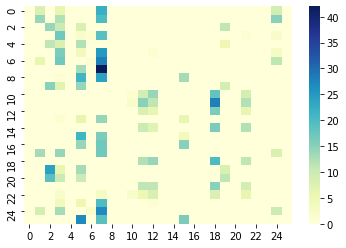

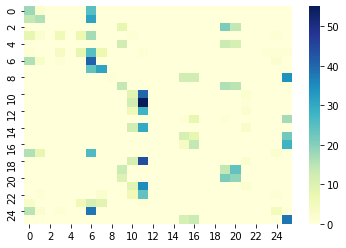

-----------------------
When UMAP components is 50, neighbors is 10, and min distance is 0.5
Average score of SVM: 0.13705179282868524
Average score of NN: 0.26374501992031874


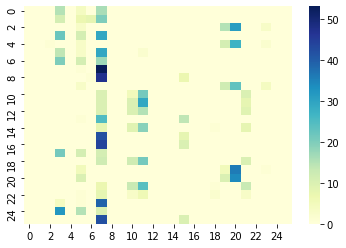

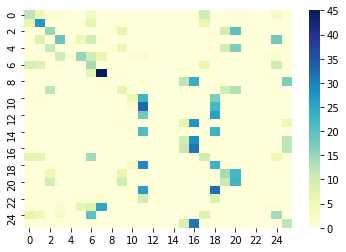

-----------------------
When UMAP components is 50, neighbors is 10, and min distance is 0.6
Average score of SVM: 0.18247011952191236
Average score of NN: 0.2446215139442231


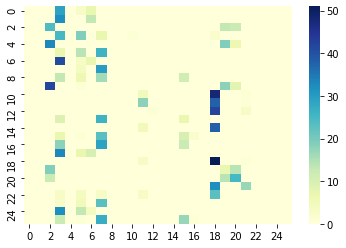

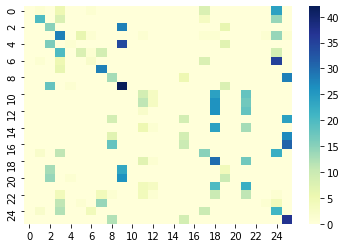

-----------------------
When UMAP components is 50, neighbors is 20, and min distance is 0.4
Average score of SVM: 0.13466135458167333
Average score of NN: 0.2175298804780877


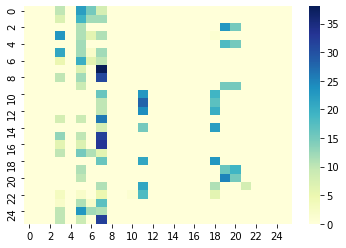

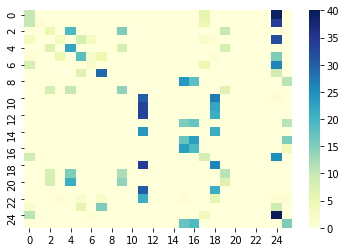

-----------------------
When UMAP components is 50, neighbors is 20, and min distance is 0.5
Average score of SVM: 0.18486055776892432
Average score of NN: 0.23745019920318727


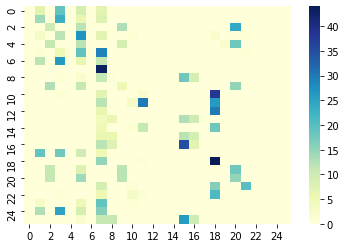

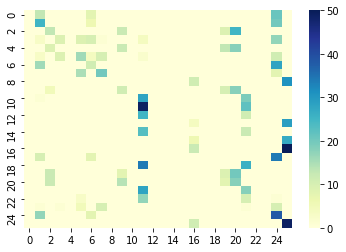

-----------------------
When UMAP components is 50, neighbors is 20, and min distance is 0.6
Average score of SVM: 0.3035856573705179
Average score of NN: 0.20159362549800797


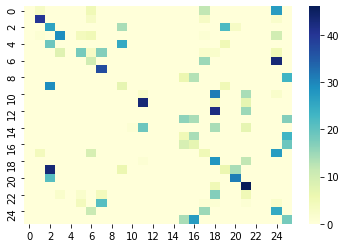

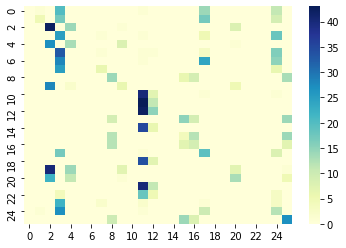

-----------------------
When UMAP components is 100, neighbors is 5, and min distance is 0.4
Average score of SVM: 0.12749003984063745
Average score of NN: 0.18406374501992032


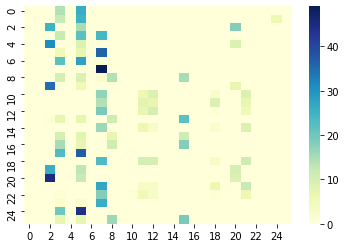

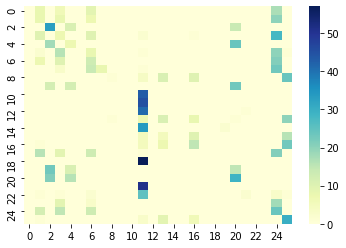

-----------------------
When UMAP components is 100, neighbors is 5, and min distance is 0.5
Average score of SVM: 0.11235059760956176
Average score of NN: 0.22310756972111556


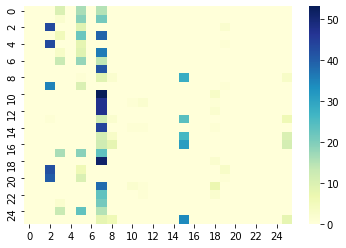

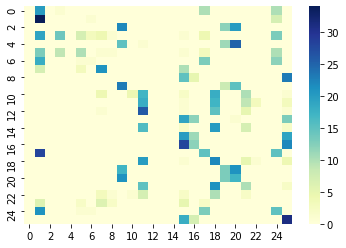

-----------------------
When UMAP components is 100, neighbors is 5, and min distance is 0.6
Average score of SVM: 0.1450199203187251
Average score of NN: 0.23027888446215142


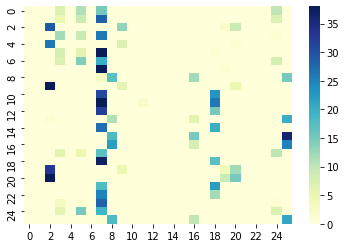

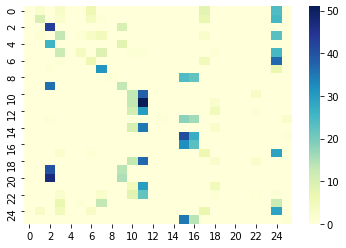

-----------------------
When UMAP components is 100, neighbors is 10, and min distance is 0.4
Average score of SVM: 0.05099601593625498
Average score of NN: 0.1832669322709163


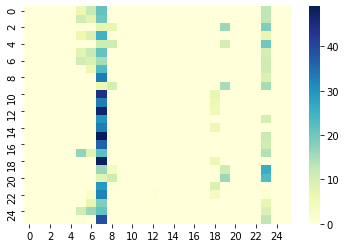

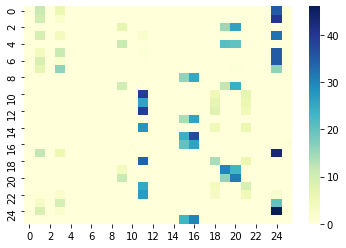

-----------------------
When UMAP components is 100, neighbors is 10, and min distance is 0.5
Average score of SVM: 0.04223107569721115
Average score of NN: 0.20876494023904382


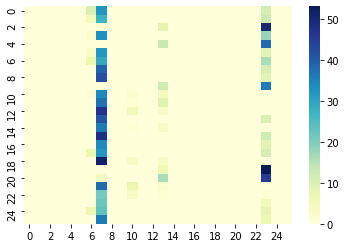

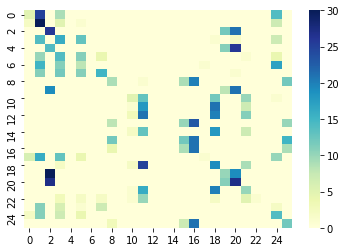

-----------------------
When UMAP components is 100, neighbors is 10, and min distance is 0.6
Average score of SVM: 0.04860557768924303
Average score of NN: 0.22709163346613542


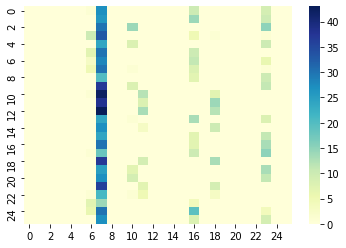

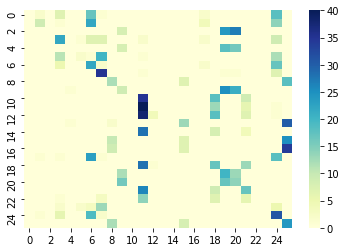

-----------------------
When UMAP components is 100, neighbors is 20, and min distance is 0.4
Average score of SVM: 0.034262948207171316
Average score of NN: 0.22231075697211153


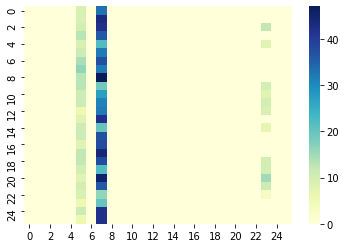

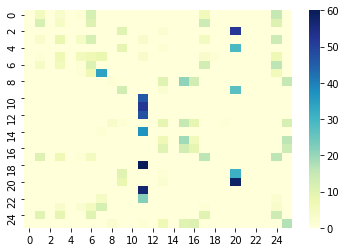

-----------------------
When UMAP components is 100, neighbors is 20, and min distance is 0.5
Average score of SVM: 0.050199203187251
Average score of NN: 0.20876494023904382


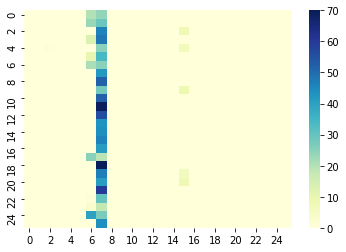

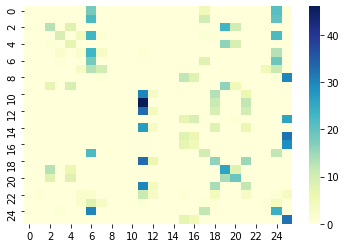

-----------------------
When UMAP components is 100, neighbors is 20, and min distance is 0.6
Average score of SVM: 0.04780876494023904
Average score of NN: 0.20637450199203186


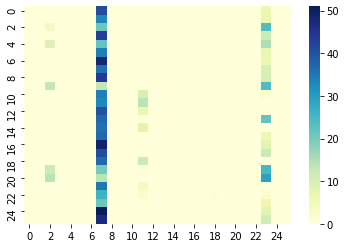

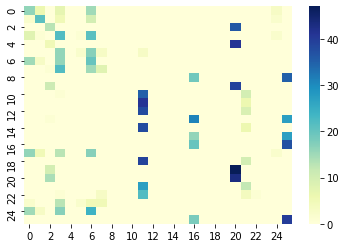

-----------------------


In [62]:
index = 0
for n in n_comps:
    for neigh in neigh_list:
        for min_dist in dist_list:
            print(f"When UMAP components is {n}, neighbors is {neigh}, and min distance is {min_dist}")
            print(f'Average score of SVM: {UMAP_scores[index]}')
            print(f'Average score of NN: {NN_scores[index]}')
            sns.heatmap(UMAP_matrix[index], cmap="YlGnBu")
            plt.show()
            sns.heatmap(NN_matrix[index], cmap="YlGnBu")
            plt.show()
            print('-----------------------')
            index += 1

In [63]:
index = 0
for n in n_comps:
    for neigh in neigh_list:
        for min_dist in dist_list:
            print(f"When UMAP components is {n}, neighbors is {neigh}, and min distance is {min_dist}")
            print("-------SVM-------")
            print(SVM_reports[index])
            print("-------NN-------")
            print(NN_reports[index])
            print('-----------------------')

When UMAP components is 2, neighbors is 5, and min distance is 0.4
-------SVM-------
              precision    recall  f1-score   support

         GBR       0.29      0.09      0.14        57
         FIN       0.81      0.94      0.87        54
         CHS       0.29      0.31      0.30        51
         PUR       0.56      0.61      0.59        36
         CDX       0.18      0.09      0.12        46
         CLM       0.70      0.64      0.67        55
         IBS       0.25      0.38      0.30        56
         PEL       0.66      0.93      0.77        43
         PJL       0.40      0.29      0.34        55
         KHV       0.30      0.47      0.37        45
         ACB       0.23      0.14      0.18        42
         GWD       0.59      0.94      0.73        70
         ESN       0.29      0.23      0.26        48
         BEB       0.00      0.00      0.00        34
         MSL       0.47      0.17      0.25        53
         STU       0.25      0.39      0.30       

In [67]:
os.system("rundll32.exe powrprof.dll,SetSuspendState 0,1,0")

0

# RNN Approach

In [25]:
class GRUClassification(nn.Module):
    def __init__(self, enc_hid_dim, output_dim, dropout, device):
        super().__init__()
        
        self.rnn = nn.GRU(1, enc_hid_dim, bidirectional = True, batch_first = True).to(device)
        
        self.fc = nn.Linear(enc_hid_dim * 2, output_dim).to(device)
        
        self.dropout = nn.Dropout(dropout).to(device)
        
    def forward(self, x):
        
        #x = [batch size, seq len]
        
        #print(x.shape)
        
        x = x.unsqueeze(2)
        
        #x = [batch size, seq len, 1]
                
        outputs, hidden = self.rnn(x)
        
        #outputs = [batch size, seq len, hidden dim * 2]
        
        outputs = self.dropout(outputs)
        
        outputs = torch.tanh(self.fc(outputs))
                                 
        outputs = outputs.permute(1,0,2)

        final_outputs = outputs[-1]
        
        final_outputs = final_outputs.squeeze(0)
        
        #final_outputs [batch size, output dim]

        return final_outputs

In [27]:
from sklearn.model_selection import train_test_split

genome_matrix = np.load("genome_matrix.npy")
X_genome_matrix = np.delete(genome_matrix, remove_samples_idx, 0)
X_genome_train, X_genome_test, Y_train, Y_test = train_test_split(X_genome_matrix, 
                                                                  Y, 
                                                                  test_size=0.20)

BATCH_SIZE = 10
EPOCHS = 30

X_genome_train = np.asarray(X_genome_train)
Y_train = np.asarray(Y_train)

X_genome_test = np.asarray(X_genome_test)
Y_test = np.asarray(Y_test)

Y_len = len(numpy.unique(Y_train))
print(Y_len)

model = GRUClassification(64, Y_len, 0.1, device)          
model.apply(init_weights)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

26


In [28]:
accuracy_list = []
for epoch in range(EPOCHS):
    epoch_loss = train(model, X_genome_train, Y_train, BATCH_SIZE, optimizer, criterion)
    print(f"Epoch {epoch} Loss: {epoch_loss}")
    
with torch.no_grad():
    predicted_list = []
    for x_input in X_genome_test:
        torch_x = torch.from_numpy(x_input).to(device).float().view(1,-1)
        output = model(torch_x)
        predicted = torch.argmax(output).item()
        predicted_list.append(predicted)
    predicted_list_np = np.asarray(predicted_list)    
    assert predicted_list_np.shape == Y_test.shape

    accuracy = 0.0
    total = 0
    for i in range(len(predicted_list_np)):
        if predicted_list_np[i] == Y_test[i]:
            accuracy += 1
        total += 1
    accuracy_list.append(accuracy / total)
    print(accuracy / total)

accuracy_np = np.asarray(accuracy_list)
print(np.amax(accuracy_np))

KeyboardInterrupt: 

# RNN Approach w/ Embedding

In [64]:
class GRUClassificationEmb(nn.Module):
    def __init__(self, emb_dim, enc_hid_dim, output_dim, dropout, device):
        super().__init__()
        
        self.embedding = nn.Embedding(3, emb_dim).to(device)
        
        self.rnn = nn.GRU(emb_dim, enc_hid_dim, bidirectional = True, batch_first = True).to(device)
        
        self.fc = nn.Linear(enc_hid_dim * 2, output_dim).to(device)
        
        self.dropout = nn.Dropout(dropout).to(device)
        
    def forward(self, x):
        
        #x = [batch size, seq len]
        
        #print(x.shape)
        
        x = x.long()
        
        embedded = self.dropout(self.embedding(x))
        
        #x = [batch size, seq len, emb_dim]
                
        outputs, hidden = self.rnn(embedded)
        
        #outputs = [batch size, seq len, hidden dim * 2]
        
        outputs = torch.tanh(self.fc(outputs))
                                 
        outputs = outputs.permute(1,0,2)

        final_outputs = outputs[-1]
        
        final_outputs = final_outputs.squeeze(0)
        
        #final_outputs [batch size, output dim]

        return final_outputs

In [65]:
from sklearn.model_selection import train_test_split

genome_matrix = np.load("genome_matrix.npy")
X_genome_matrix = np.delete(genome_matrix, remove_samples_idx, 0)
X_genome_train, X_genome_test, Y_train, Y_test = train_test_split(X_genome_matrix, 
                                                                  Y, 
                                                                  test_size=0.20)

BATCH_SIZE = 10
EPOCHS = 30

X_genome_train = np.asarray(X_genome_train)
Y_train = np.asarray(Y_train)

X_genome_test = np.asarray(X_genome_test)
Y_test = np.asarray(Y_test)

Y_len = len(numpy.unique(Y_train))
print(Y_len)

model = GRUClassificationEmb(16, 32, Y_len, 0.1, device)          
model.apply(init_weights)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

26


In [66]:
%%time
accuracy_list = []
for epoch in range(EPOCHS):
    epoch_loss = train(model, X_genome_train, Y_train, BATCH_SIZE, optimizer, criterion)
    print(f"Epoch {epoch} Loss: {epoch_loss}")
    
    with torch.no_grad():
        predicted_list = []
        for x_input in X_genome_test:
            torch_x = torch.from_numpy(x_input).to(device).float().view(1,-1)
            output = model(torch_x)
            predicted = torch.argmax(output).item()
            predicted_list.append(predicted)
        predicted_list_np = np.asarray(predicted_list)    
        assert predicted_list_np.shape == Y_test.shape

        accuracy = 0.0
        total = 0
        for i in range(len(predicted_list_np)):
            if predicted_list_np[i] == Y_test[i]:
                accuracy += 1
            total += 1
        accuracy_list.append(accuracy / total)
        print(accuracy / total)

accuracy_np = np.asarray(accuracy_list)
print(np.amax(accuracy_np))

Epoch 0 Loss: 3.214667171239853
0.06387225548902195
Epoch 1 Loss: 3.0514331781864166
0.06187624750499002
Epoch 2 Loss: 2.8843610775470734
0.10578842315369262
Epoch 3 Loss: 2.828994461297989
0.10978043912175649
Epoch 4 Loss: 2.812772626876831
0.1277445109780439
Epoch 5 Loss: 2.7964092886447904
0.11377245508982035
Epoch 6 Loss: 2.7879343962669374
0.11177644710578842
Epoch 7 Loss: 2.799373985528946
0.09181636726546906
Epoch 8 Loss: 2.775708086490631
0.11776447105788423
Epoch 9 Loss: 2.7718495285511016
0.11976047904191617
Epoch 10 Loss: 2.763816479444504
0.0998003992015968
Epoch 11 Loss: 2.7543486630916596
0.10179640718562874
Epoch 12 Loss: 2.748881837129593
0.11776447105788423
Epoch 13 Loss: 2.7398045802116395
0.1217564870259481
Epoch 14 Loss: 2.7322392618656157
0.10978043912175649
Epoch 15 Loss: 2.724809626340866
0.11177644710578842
Epoch 16 Loss: 2.7162295460700987
0.1157684630738523
Epoch 17 Loss: 2.709087554216385
0.10778443113772455
Epoch 18 Loss: 2.700458788871765
0.1117764471057884

# CNN Approach

In [14]:
class CNNet(nn.Module):
    def __init__(self, num_classes, device):
        super().__init__()
        self.conv1 = nn.Conv1d(1, 3, 5).to(device)
        self.pool = nn.MaxPool1d(2, 2).to(device)
        self.conv2 = nn.Conv1d(3, 10, 5).to(device)
        self.fc1 = nn.Linear(10 * 7152, 5000).to(device)
        self.fc2 = nn.Linear(5000, 3000).to(device)
        self.fc3 = nn.Linear(3000, num_classes).to(device)

    def forward(self, x):
        x = x.unsqueeze(1)
        #print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        #print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [15]:
from sklearn.model_selection import train_test_split

genome_matrix = np.load("genome_matrix.npy")
X_genome_matrix = np.delete(genome_matrix, remove_samples_idx, 0)
Y_train_unique = 0
Y_test_unique = 0

while(Y_train_unique != len(np.unique(Y)) or Y_test_unique != len(np.unique(Y))):
    X_genome_train, X_genome_test, Y_train, Y_test = train_test_split(X_genome_matrix, 
                                                                  Y, 
                                                                  test_size=0.10)
    Y_train_unique = len(numpy.unique(Y_train))
    Y_test_unique = len(numpy.unique(Y_test))

BATCH_SIZE = 5
EPOCHS = 30

X_genome_train = np.asarray(X_genome_train)
Y_train = np.asarray(Y_train)

X_genome_test = np.asarray(X_genome_test)
Y_test = np.asarray(Y_test)

Y_len = len(numpy.unique(Y_train))
print(Y_len)

model = CNNet(Y_len, device)          
model.apply(init_weights)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

6


In [16]:
accuracy_list = []
for epoch in range(EPOCHS):
    epoch_loss = train(model, X_genome_train, Y_train, BATCH_SIZE, optimizer, criterion)
    print(f"Epoch {epoch} Loss: {epoch_loss}")
    
    with torch.no_grad():
        predicted_list = []
        for x_input in X_genome_test:
            torch_x = torch.from_numpy(x_input).to(device).float().view(1,-1)
            output = model(torch_x)
            predicted = torch.argmax(output).item()
            predicted_list.append(predicted)
        predicted_list_np = np.asarray(predicted_list)    
        assert predicted_list_np.shape == Y_test.shape

        accuracy = 0.0
        total = 0
        for i in range(len(predicted_list_np)):
            if predicted_list_np[i] == Y_test[i]:
                accuracy += 1
            total += 1
        accuracy_list.append(accuracy / total)
        print(accuracy / total)

accuracy_np = np.asarray(accuracy_list)
print(np.amax(accuracy_np))

Epoch 0 Loss: 1.738947291639116
0.18725099601593626
Epoch 1 Loss: 1.7273845797114902
0.18725099601593626
Epoch 2 Loss: 1.726868433157603
0.18725099601593626
Epoch 3 Loss: 1.7276656479305692
0.18725099601593626
Epoch 4 Loss: 1.7278172021441989
0.18725099601593626
Epoch 5 Loss: 1.7274032060305278
0.18725099601593626
Epoch 6 Loss: 1.7231101560592652
0.18725099601593626
Epoch 7 Loss: 1.7254687674840292
0.18725099601593626


KeyboardInterrupt: 

# Big Populations

In [20]:
samples_file = "ps2_pca.samples.txt"
samples = [item.strip() for item in open(samples_file, "r").readlines()]
pop_dict = {}
remove_samples_idx = []

for pop in ["ACB","ASW"]: pop_to_color[pop] = "blue" # Admixed African
for pop in ["GIH","BEB","ITU"]: pop_to_color[pop] = "orange" # South Asian
for pop in ["CDX","CHB","CHS","JPT","KHV"]: pop_to_color[pop] = "green" # East Asian
for pop in ["CEU","FIN","GBR","IBS","TSI"]: pop_to_color[pop] = "yellow" # European
for pop in ["CLM","MXL","PEL","PJL","PUR","STU"]: pop_to_color[pop] = "purple" # American
for pop in ["LWK","MSL","YRI","ESN","GWD"]: pop_to_color[pop] = "red" # African

idx = 0
for sample in samples:
    pop = sample_to_pop.get(sample, "None")
    if pop == "None":
        remove_samples_idx.append(idx)
        continue
    if pop not in pop_dict:
        pop_dict[pop] = len(pop_dict)
    idx += 1
    
Y = []
for sample in samples:
    pop = sample_to_pop.get(sample, "None")
    if pop == "None":
        continue
    if pop in ["ACB", "ASW"]:
        Y.append(0)
    elif pop in ["GIH","BEB","ITU"]:
        Y.append(1)
    elif pop in ["CDX","CHB","CHS","JPT","KHV"]:
        Y.append(2)
    elif pop in ["CEU","FIN","GBR","IBS","TSI"]:
        Y.append(3)
    elif pop in ["CLM","MXL","PEL","PJL","PUR","STU"]:
        Y.append(4)
    elif pop in ["LWK","MSL","YRI","ESN","GWD"]:
        Y.append(5)
    else:
        continue
    
print(len(pop_dict))
print(len(Y))
print(remove_samples_idx)
X = np.delete(genome_matrix, remove_samples_idx, 0)
print(X.shape)

Y_np = np.asarray(Y)
unique, counts = numpy.unique(Y_np, return_counts=True)
frequencies = numpy.asarray((unique, counts)).T
print(frequencies)

target_names = ["Admixed African", "South Asian", "East Asian", "European", "American", "African"]

26
2501
[1668, 1901, 2187]
(2501, 28622)
[[  0 156]
 [  1 291]
 [  2 504]
 [  3 502]
 [  4 545]
 [  5 503]]


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

iteration = 30

#PCA_val = 10

PCA_list_val = [2, 10, 50, 100, 500, 1000, 2000]
PCA_scores = []
NN_scores = []
SVM_reports = []
NN_reports = []

PCA_matrix = []
NN_matrix = []


for PCA_val in PCA_list_val:
    print("------PCA_VAL-------")
    avg_score_SVM = 0.0
    avg_score_NN = 0.0
    
    SVM_Confusion = None
    NN_Confusion = None
    
    total_SVM_pred = None
    total_NN_pred = None
    total_target = None

    for i in range(iteration):
        genome_matrix = np.load("genome_matrix.npy")
        X_genome_matrix = np.delete(genome_matrix, remove_samples_idx, 0)
        
        Y_train_unique = 0
        Y_test_unique = 0
        
        while(Y_train_unique != len(np.unique(Y)) or Y_test_unique != len(np.unique(Y))):
            X_genome_train, X_genome_test, Y_train, Y_test = train_test_split(X_genome_matrix, 
                                                                          Y, 
                                                                          test_size=0.10)
            Y_train_unique = len(numpy.unique(Y_train))
            Y_test_unique = len(numpy.unique(Y_test))
        

        file_name_train = f'PCA_SVM/PCA_SVM_Train_Comp_{PCA_val}_Random_{SEED}.npy'
        file_name_test = f'PCA_SVM/PCA_SVM_Test_Comp_{PCA_val}_Random_{SEED}.npy'

        X_PCA_train, X_PCA_test = generate_PCA_train_test(X_genome_train, 
                                                          X_genome_test, 
                                                          PCA_val, 
                                                          file_name_train, 
                                                          file_name_test)

        score_SVM, c_matrix, SVM_pred = train_and_test_SVM(X_PCA_train, X_PCA_test, Y_train, Y_test)
        avg_score_SVM += score_SVM
        
        if SVM_Confusion is None:
            SVM_Confusion = c_matrix
        else:
            SVM_Confusion += c_matrix

        BATCH_SIZE = 200
        EPOCHS = 70

        Y_train = np.asarray(Y_train)

        Y_test = np.asarray(Y_test)

        Y_len = len(numpy.unique(Y_train))
        #print(Y_len)

        model = ClassificationPCA(X_PCA_train.shape[1], Y_len, device)            
        model.apply(init_weights)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters())

        best_accuracy = 0.0
        best_matrix = None
        best_NN_pred = None
        for epoch in range(EPOCHS):
            epoch_loss = train(model, X_PCA_train, Y_train, BATCH_SIZE, optimizer, criterion)
            if epoch % 10 == 0:
                #print(f"Epoch {epoch} Loss: {epoch_loss}")
                pass

            with torch.no_grad():
                torch_x = torch.from_numpy(X_PCA_test).to(device).float()
                output = model(torch_x)
                predicted = torch.argmax(output, dim=1)
                assert predicted.shape == Y_test.shape

                accuracy = 0.0
                total = 0
                for i in range(len(predicted)):
                    if predicted[i] == Y_test[i]:
                        accuracy += 1
                    total += 1
                current_accuracy = accuracy / total
                if current_accuracy > best_accuracy:
                    best_accuracy = current_accuracy
                    best_matrix = confusion_matrix(Y_test, predicted.cpu().detach().numpy())
                    best_NN_pred = predicted.cpu().detach().numpy()

        avg_score_NN += best_accuracy
        if NN_Confusion is None:
            NN_Confusion = best_matrix
        else:
            NN_Confusion += best_matrix
            
        if total_SVM_pred is None:
            total_SVM_pred = SVM_pred
        else:
            total_SVM_pred = np.concatenate((total_SVM_pred, SVM_pred), axis=None)
            
        if total_NN_pred is None:
            total_NN_pred = best_NN_pred
        else:
            total_NN_pred = np.concatenate((total_NN_pred, best_NN_pred), axis=None)
        
        if total_target is None:
            total_target = Y_test
        else:
            total_target = np.concatenate((total_target, Y_test), axis=None)

    PCA_scores.append(avg_score_SVM / iteration)
    NN_scores.append(avg_score_NN / iteration)
    
    PCA_matrix.append(SVM_Confusion)
    NN_matrix.append(NN_Confusion)
     
    SVM_reports.append(classification_report(total_target, total_SVM_pred, target_names=target_names))
    NN_reports.append(classification_report(total_target, total_NN_pred, target_names=target_names))

------PCA_VAL-------
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished PCA...
Generating PCA...
Finished 

When PCA components is 2
Average score of SVM: 0.8241699867197875
Average score of NN: 0.832536520584329


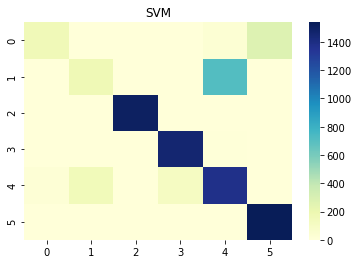

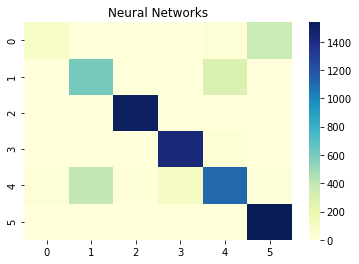

-----------------------
When PCA components is 10
Average score of SVM: 0.8717131474103582
Average score of NN: 0.8798140770252323


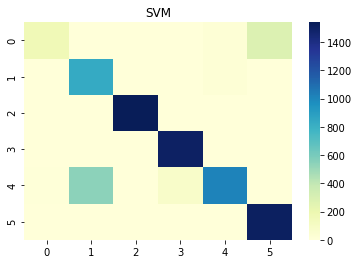

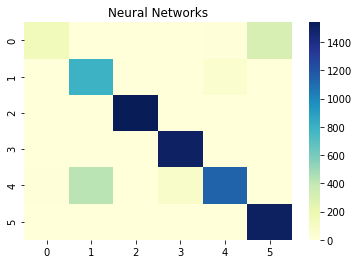

-----------------------
When PCA components is 50
Average score of SVM: 0.8719787516600263
Average score of NN: 0.8820717131474102


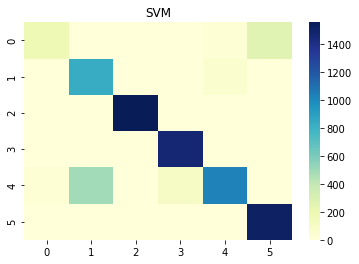

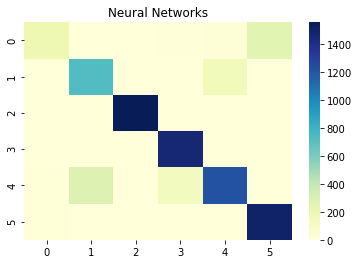

-----------------------
When PCA components is 100
Average score of SVM: 0.8717131474103584
Average score of NN: 0.8800796812749003


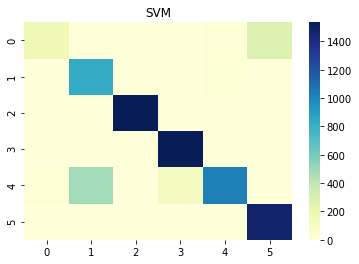

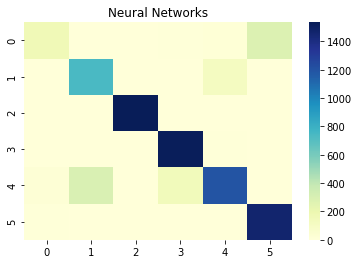

-----------------------
When PCA components is 500
Average score of SVM: 0.8505976095617528
Average score of NN: 0.8559096945551125


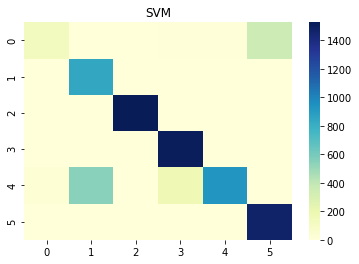

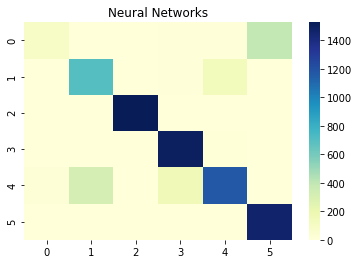

-----------------------
When PCA components is 1000
Average score of SVM: 0.8483399734395749
Average score of NN: 0.8573705179282867


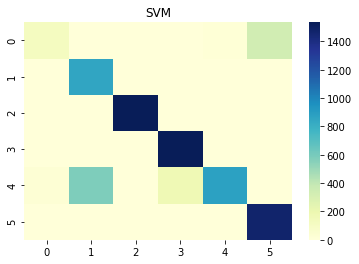

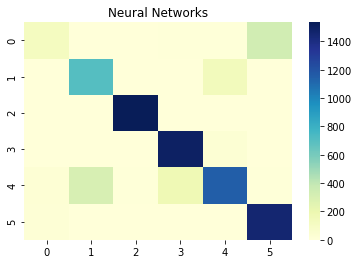

-----------------------
When PCA components is 2000
Average score of SVM: 0.8444887118193888
Average score of NN: 0.8464807436918989


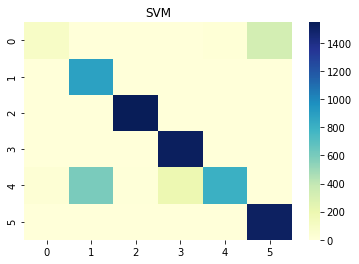

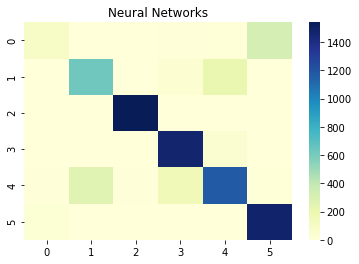

-----------------------


In [24]:
for i in range(len(PCA_list_val)):
    print(f"When PCA components is {PCA_list_val[i]}")
    print(f'Average score of SVM: {PCA_scores[i]}')
    print(f'Average score of NN: {NN_scores[i]}')
    sns.heatmap(PCA_matrix[i], cmap="YlGnBu")
    plt.title("SVM")
    plt.show()
    sns.heatmap(NN_matrix[i], cmap="YlGnBu")
    plt.title("Neural Networks")
    plt.show()
    print('-----------------------')

In [23]:
for i in range(len(PCA_list_val)):
    print(f"When PCA components is {PCA_list_val[i]}")
    print("-------SVM-------")
    print(SVM_reports[i])
    print("-------NN-------")
    print(NN_reports[i])
    print('-----------------------')

When PCA components is 2
-------SVM-------
                 precision    recall  f1-score   support

Admixed African       0.86      0.34      0.48       467
    South Asian       0.52      0.19      0.28       885
     East Asian       1.00      1.00      1.00      1506
       European       0.93      0.99      0.96      1463
       American       0.65      0.83      0.73      1670
        African       0.85      1.00      0.92      1539

       accuracy                           0.82      7530
      macro avg       0.80      0.72      0.73      7530
   weighted avg       0.81      0.82      0.80      7530

-------NN-------
                 precision    recall  f1-score   support

Admixed African       0.78      0.18      0.29       467
    South Asian       0.60      0.68      0.64       885
     East Asian       0.99      1.00      0.99      1506
       European       0.93      0.98      0.95      1463
       American       0.77      0.67      0.71      1670
        African       0.

# UMAP Big Populations

In [84]:
%%time

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

iteration = 5

#PCA_val = 10

n_comps = [2, 10, 50, 100]
neigh_list = [5, 10, 20]
dist_list = [0.4, 0.5, 0.6]
UMAP_scores = []
NN_scores = []

SVM_reports = []
NN_reports = []

UMAP_matrix = []
NN_matrix = []

SEED = 1234


for n in n_comps:
    for neigh in neigh_list:
        for min_dist in dist_list:
            
            avg_score_SVM = 0.0
            avg_score_NN = 0.0

            SVM_Confusion = None
            NN_Confusion = None
            
            total_SVM_pred = None
            total_NN_pred = None
            total_target = None

            for i in range(iteration):
                genome_matrix = np.load("genome_matrix.npy")
                X_genome_matrix = np.delete(genome_matrix, remove_samples_idx, 0)
                
                
                Y_train_unique = 0
                Y_test_unique = 0
                
                while(Y_train_unique != len(np.unique(Y)) or Y_test_unique != len(np.unique(Y))):
                    X_genome_train, X_genome_test, Y_train, Y_test = train_test_split(X_genome_matrix, 
                                                                                  Y, 
                                                                                  test_size=0.10)
                    Y_train_unique = len(numpy.unique(Y_train))
                    Y_test_unique = len(numpy.unique(Y_test))

                file_name_train = f'UMAP_SVM/UMAP_SVM_Train_Comp_{n}_Neigh_{neigh}_Dist_{min_dist}_Random_{SEED}.npy'
                file_name_test = f'UMAP_SVM/UMAP_SVM_Test_Comp_{n}_Neigh_{neigh}_Dist_{min_dist}_Random_{SEED}.npy'
                
                
                X_UMAP_train, X_UMAP_test = generate_UMAP_train_test(X_genome_train, 
                                         X_genome_test, 
                                         n, 
                                         neigh, 
                                         min_dist, 
                                         'euclidean', 
                                         file_name_train, 
                                         file_name_test)

                score_SVM, c_matrix, SVM_pred = train_and_test_SVM(X_UMAP_train, X_UMAP_test, Y_train, Y_test)
                avg_score_SVM += score_SVM

                if SVM_Confusion is None:
                    SVM_Confusion = c_matrix
                else:
                    SVM_Confusion += c_matrix

                BATCH_SIZE = 200
                EPOCHS = 70

                Y_train = np.asarray(Y_train)

                Y_test = np.asarray(Y_test)

                Y_len = len(numpy.unique(Y_train))
                #print(Y_len)

                model = ClassificationPCA(X_UMAP_train.shape[1], Y_len, device)            
                model.apply(init_weights)
                criterion = nn.CrossEntropyLoss()
                optimizer = optim.Adam(model.parameters())

                best_accuracy = 0.0
                best_matrix = None
                best_NN_pred = None
                for epoch in range(EPOCHS):
                    epoch_loss = train(model, X_UMAP_train, Y_train, BATCH_SIZE, optimizer, criterion)
                    if epoch % 10 == 0:
                        #print(f"Epoch {epoch} Loss: {epoch_loss}")
                        pass

                    with torch.no_grad():
                        torch_x = torch.from_numpy(X_UMAP_test).to(device).float()
                        output = model(torch_x)
                        predicted = torch.argmax(output, dim=1)
                        assert predicted.shape == Y_test.shape

                        accuracy = 0.0
                        total = 0
                        for i in range(len(predicted)):
                            if predicted[i] == Y_test[i]:
                                accuracy += 1
                            total += 1
                        current_accuracy = accuracy / total
                        if current_accuracy > best_accuracy:
                            best_accuracy = current_accuracy
                            best_matrix = confusion_matrix(Y_test, predicted.cpu().detach().numpy())
                            best_NN_pred = predicted.cpu().detach().numpy()

                avg_score_NN += best_accuracy
#                 print(best_accuracy)
#                 print(score_SVM)
                if NN_Confusion is None:
                    NN_Confusion = best_matrix
                else:
                    NN_Confusion += best_matrix

                if total_SVM_pred is None:
                    total_SVM_pred = SVM_pred
                else:
                    total_SVM_pred = np.concatenate((total_SVM_pred, SVM_pred), axis=None)

                if total_NN_pred is None:
                    total_NN_pred = best_NN_pred
                else:
                    total_NN_pred = np.concatenate((total_NN_pred, best_NN_pred), axis=None)

                if total_target is None:
                    total_target = Y_test
                else:
                    total_target = np.concatenate((total_target, Y_test), axis=None)
    
            UMAP_scores.append(avg_score_SVM / iteration)
            NN_scores.append(avg_score_NN / iteration)

            UMAP_matrix.append(SVM_Confusion)
            NN_matrix.append(NN_Confusion)
            
            SVM_reports.append(classification_report(total_target, total_SVM_pred, target_names=target_names))
            NN_reports.append(classification_report(total_target, total_NN_pred, target_names=target_names))

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished 

C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Generating UMAP...
Finished UMAP...
Wall time: 5h 1min 48s


C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\miniconda3\envs\CSE291\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jayra\m

When UMAP components is 2, neighbors is 5, and min distance is 0.4
Average score of SVM: 0.8215139442231075
Average score of NN: 0.8262948207171315


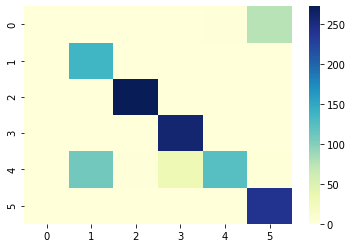

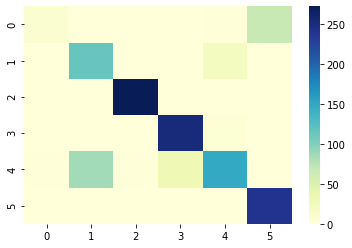

-----------------------
When UMAP components is 2, neighbors is 5, and min distance is 0.5
Average score of SVM: 0.8414342629482071
Average score of NN: 0.8557768924302789


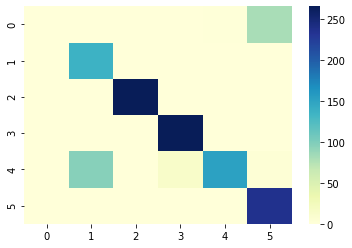

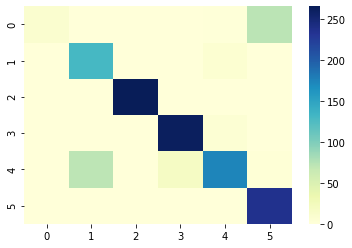

-----------------------
When UMAP components is 2, neighbors is 5, and min distance is 0.6
Average score of SVM: 0.8438247011952191
Average score of NN: 0.8573705179282868


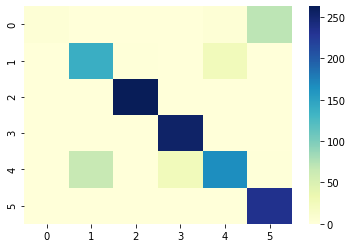

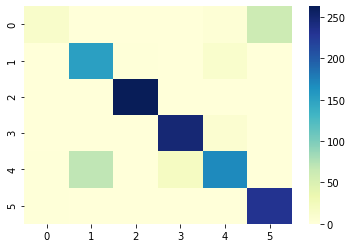

-----------------------
When UMAP components is 2, neighbors is 10, and min distance is 0.4
Average score of SVM: 0.8302788844621514
Average score of NN: 0.8366533864541832


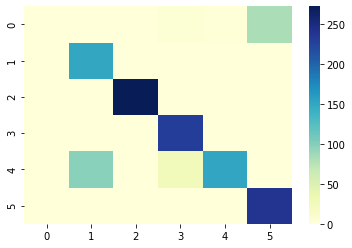

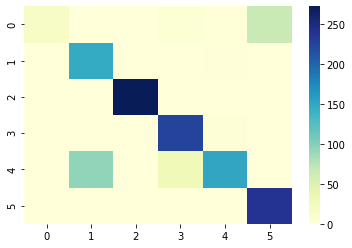

-----------------------
When UMAP components is 2, neighbors is 10, and min distance is 0.5
Average score of SVM: 0.8239043824701195
Average score of NN: 0.8334661354581673


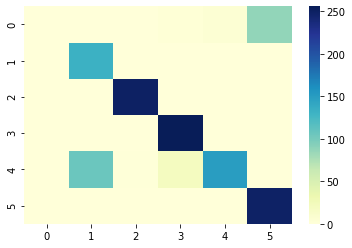

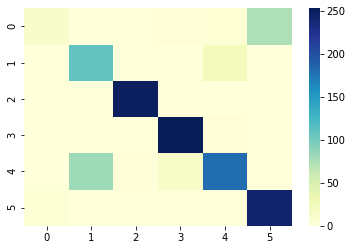

-----------------------
When UMAP components is 2, neighbors is 10, and min distance is 0.6
Average score of SVM: 0.844621513944223
Average score of NN: 0.847011952191235


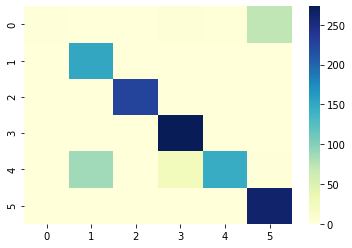

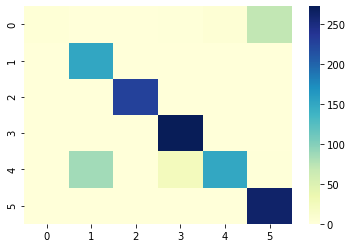

-----------------------
When UMAP components is 2, neighbors is 20, and min distance is 0.4
Average score of SVM: 0.8334661354581673
Average score of NN: 0.8430278884462151


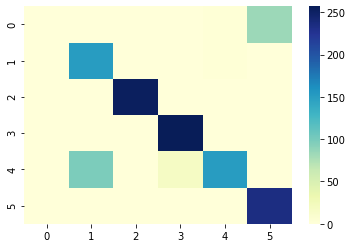

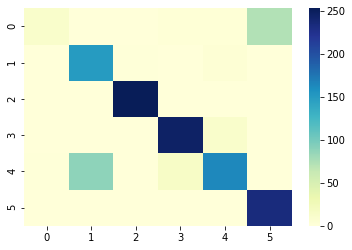

-----------------------
When UMAP components is 2, neighbors is 20, and min distance is 0.5
Average score of SVM: 0.8398406374501992
Average score of NN: 0.847011952191235


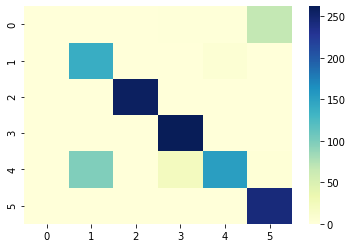

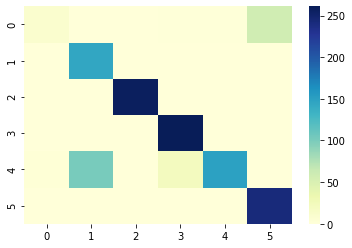

-----------------------
When UMAP components is 2, neighbors is 20, and min distance is 0.6
Average score of SVM: 0.849402390438247
Average score of NN: 0.851792828685259


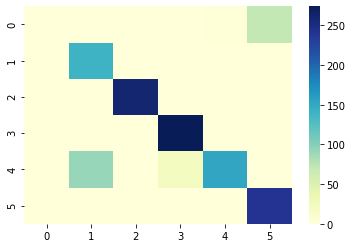

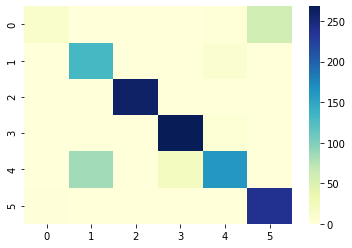

-----------------------
When UMAP components is 10, neighbors is 5, and min distance is 0.4
Average score of SVM: 0.8286852589641434
Average score of NN: 0.847011952191235


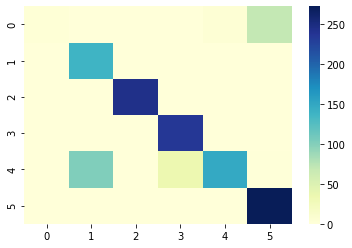

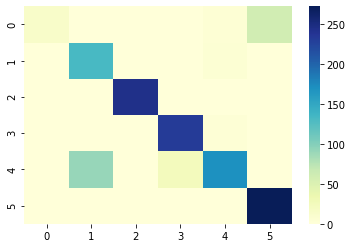

-----------------------
When UMAP components is 10, neighbors is 5, and min distance is 0.5
Average score of SVM: 0.8262948207171315
Average score of NN: 0.8422310756972111


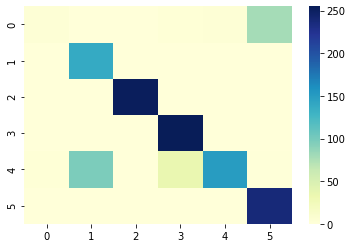

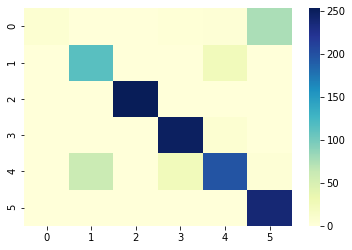

-----------------------
When UMAP components is 10, neighbors is 5, and min distance is 0.6
Average score of SVM: 0.8278884462151395
Average score of NN: 0.8350597609561753


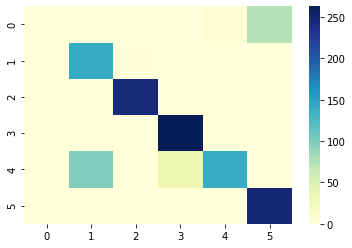

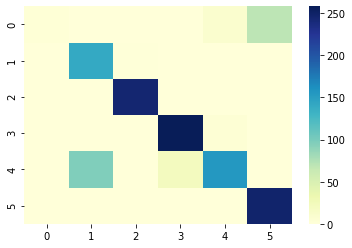

-----------------------
When UMAP components is 10, neighbors is 10, and min distance is 0.4
Average score of SVM: 0.8270916334661355
Average score of NN: 0.8382470119521912


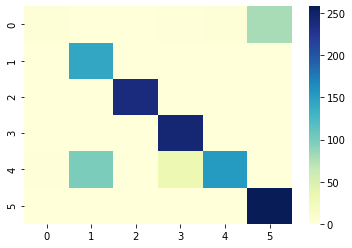

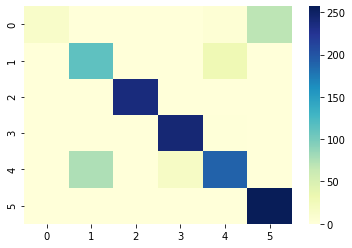

-----------------------
When UMAP components is 10, neighbors is 10, and min distance is 0.5
Average score of SVM: 0.8438247011952191
Average score of NN: 0.8661354581673306


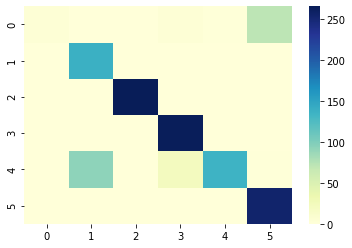

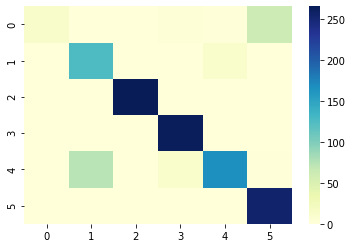

-----------------------
When UMAP components is 10, neighbors is 10, and min distance is 0.6
Average score of SVM: 0.8438247011952191
Average score of NN: 0.8669322709163346


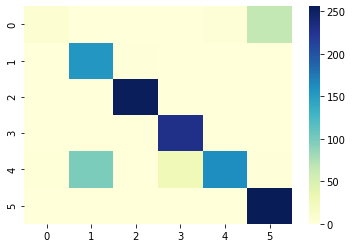

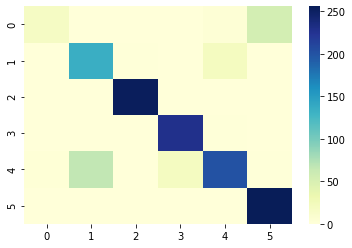

-----------------------
When UMAP components is 10, neighbors is 20, and min distance is 0.4
Average score of SVM: 0.8215139442231075
Average score of NN: 0.844621513944223


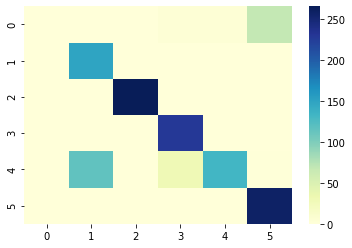

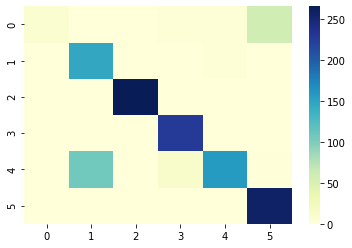

-----------------------
When UMAP components is 10, neighbors is 20, and min distance is 0.5
Average score of SVM: 0.8430278884462151
Average score of NN: 0.850996015936255


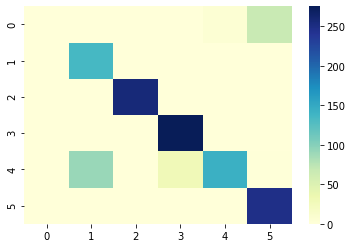

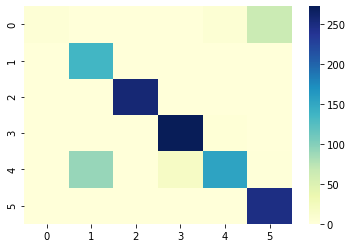

-----------------------
When UMAP components is 10, neighbors is 20, and min distance is 0.6
Average score of SVM: 0.8231075697211155
Average score of NN: 0.8382470119521912


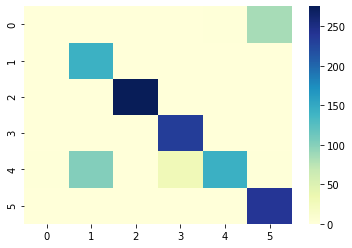

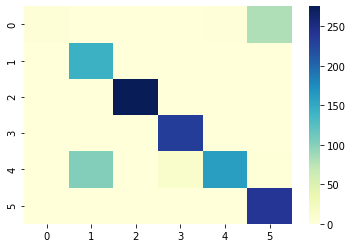

-----------------------
When UMAP components is 50, neighbors is 5, and min distance is 0.4
Average score of SVM: 0.8143426294820717
Average score of NN: 0.8231075697211155


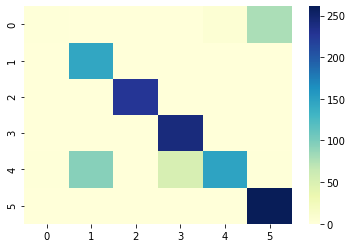

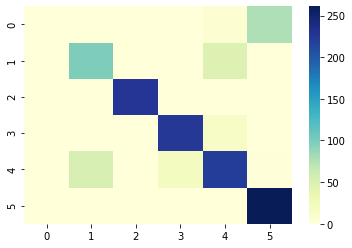

-----------------------
When UMAP components is 50, neighbors is 5, and min distance is 0.5
Average score of SVM: 0.844621513944223
Average score of NN: 0.8557768924302789


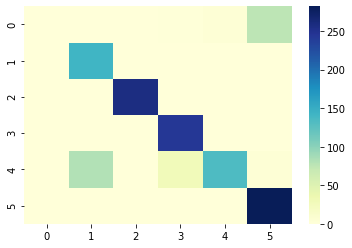

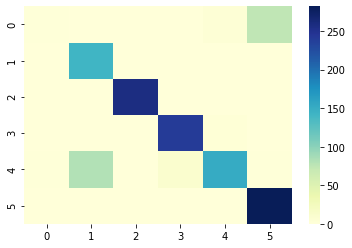

-----------------------
When UMAP components is 50, neighbors is 5, and min distance is 0.6
Average score of SVM: 0.851792828685259
Average score of NN: 0.8262948207171315


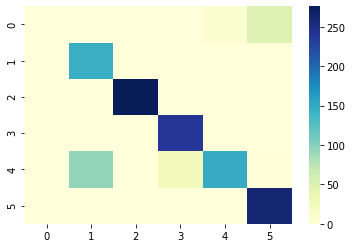

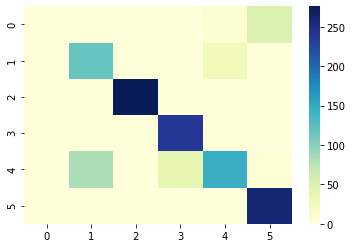

-----------------------
When UMAP components is 50, neighbors is 10, and min distance is 0.4
Average score of SVM: 0.5418326693227092
Average score of NN: 0.8374501992031872


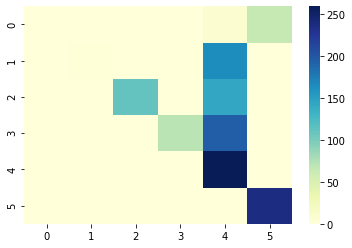

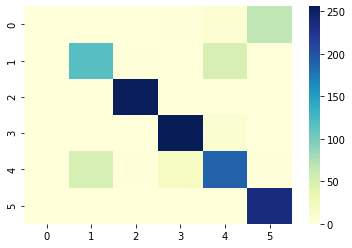

-----------------------
When UMAP components is 50, neighbors is 10, and min distance is 0.5
Average score of SVM: 0.550597609561753
Average score of NN: 0.8390438247011952


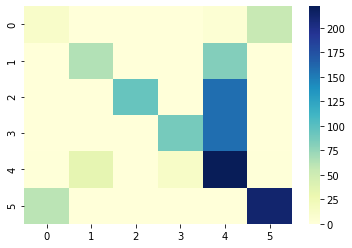

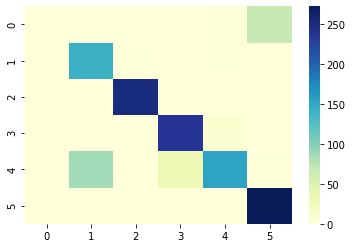

-----------------------
When UMAP components is 50, neighbors is 10, and min distance is 0.6
Average score of SVM: 0.7450199203187251
Average score of NN: 0.8254980079681274


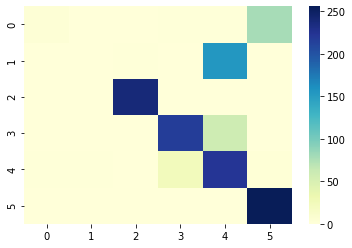

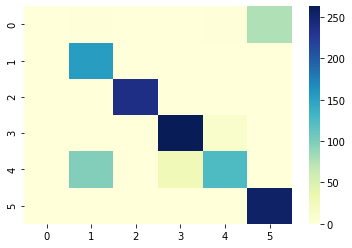

-----------------------
When UMAP components is 50, neighbors is 20, and min distance is 0.4
Average score of SVM: 0.48924302788844615
Average score of NN: 0.8199203187250996


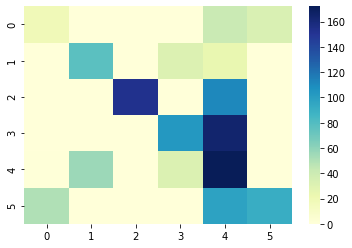

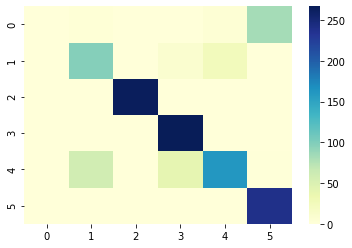

-----------------------
When UMAP components is 50, neighbors is 20, and min distance is 0.5
Average score of SVM: 0.7426294820717131
Average score of NN: 0.8191235059760956


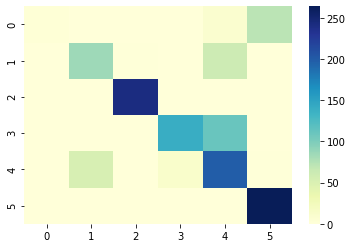

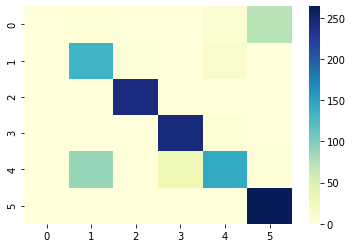

-----------------------
When UMAP components is 50, neighbors is 20, and min distance is 0.6
Average score of SVM: 0.7386454183266933
Average score of NN: 0.8071713147410359


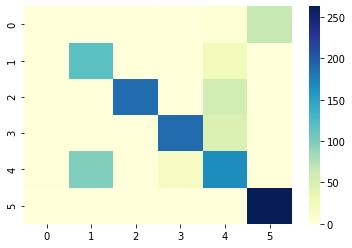

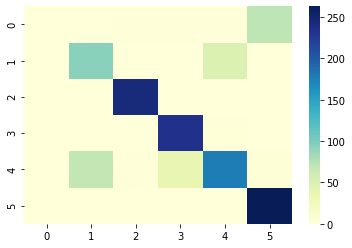

-----------------------
When UMAP components is 100, neighbors is 5, and min distance is 0.4
Average score of SVM: 0.3211155378486056
Average score of NN: 0.8119521912350598


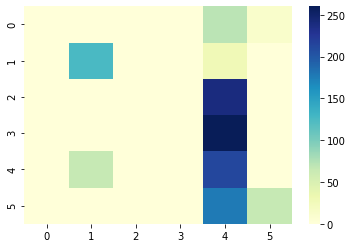

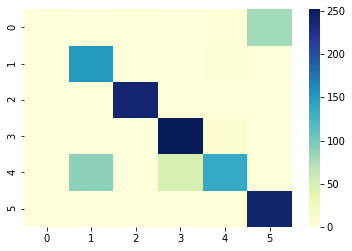

-----------------------
When UMAP components is 100, neighbors is 5, and min distance is 0.5
Average score of SVM: 0.26055776892430277
Average score of NN: 0.8047808764940239


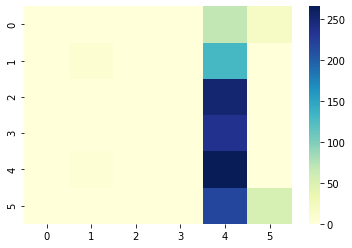

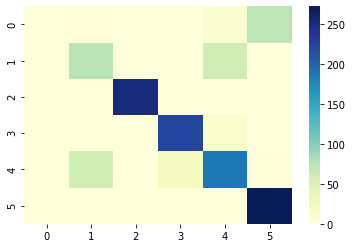

-----------------------
When UMAP components is 100, neighbors is 5, and min distance is 0.6
Average score of SVM: 0.40318725099601593
Average score of NN: 0.851792828685259


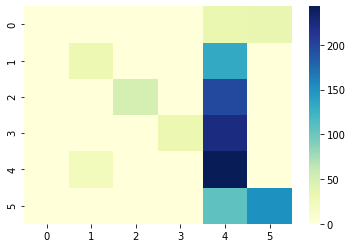

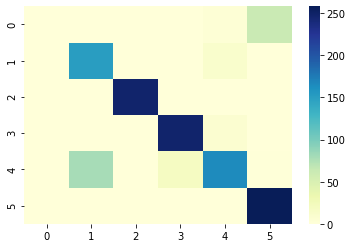

-----------------------
When UMAP components is 100, neighbors is 10, and min distance is 0.4
Average score of SVM: 0.21354581673306772
Average score of NN: 0.799203187250996


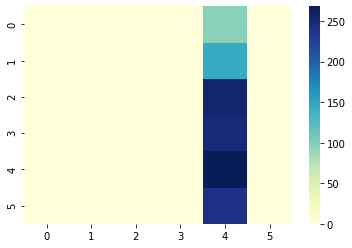

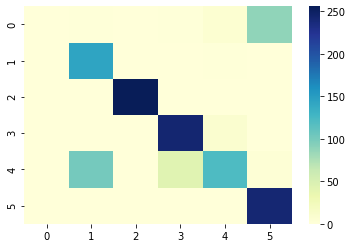

-----------------------
When UMAP components is 100, neighbors is 10, and min distance is 0.5
Average score of SVM: 0.3043824701195219
Average score of NN: 0.8223107569721115


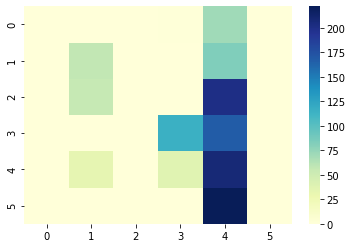

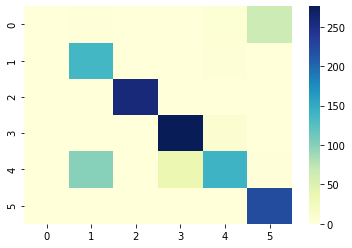

-----------------------
When UMAP components is 100, neighbors is 10, and min distance is 0.6
Average score of SVM: 0.2414342629482072
Average score of NN: 0.8119521912350598


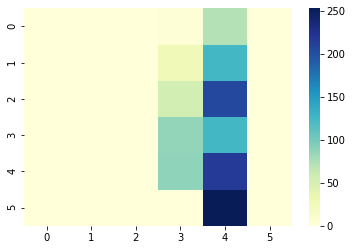

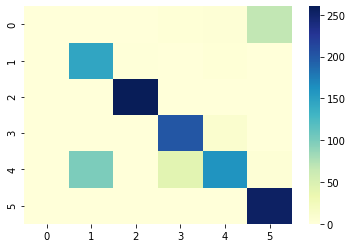

-----------------------
When UMAP components is 100, neighbors is 20, and min distance is 0.4
Average score of SVM: 0.24860557768924302
Average score of NN: 0.7760956175298805


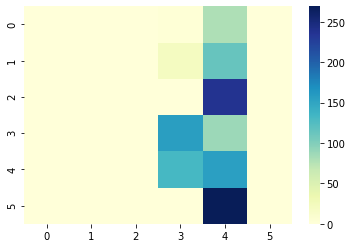

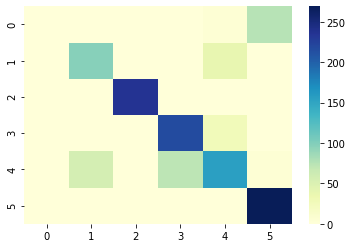

-----------------------
When UMAP components is 100, neighbors is 20, and min distance is 0.5
Average score of SVM: 0.26374501992031874
Average score of NN: 0.7689243027888446


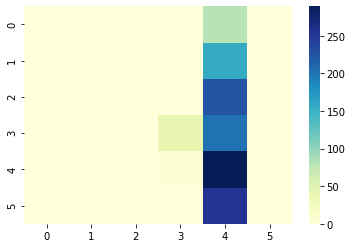

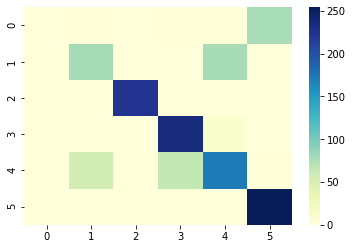

-----------------------
When UMAP components is 100, neighbors is 20, and min distance is 0.6
Average score of SVM: 0.19123505976095617
Average score of NN: 0.8358565737051793


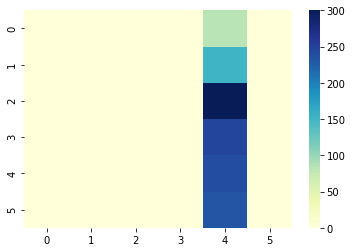

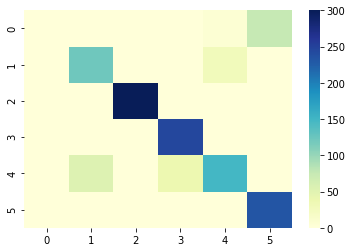

-----------------------


In [85]:
index = 0
for n in n_comps:
    for neigh in neigh_list:
        for min_dist in dist_list:
            print(f"When UMAP components is {n}, neighbors is {neigh}, and min distance is {min_dist}")
            print(f'Average score of SVM: {UMAP_scores[index]}')
            print(f'Average score of NN: {NN_scores[index]}')
            sns.heatmap(UMAP_matrix[index], cmap="YlGnBu")
            plt.show()
            sns.heatmap(NN_matrix[index], cmap="YlGnBu")
            plt.show()
            print('-----------------------')
            index += 1

In [86]:
index = 0
for n in n_comps:
    for neigh in neigh_list:
        for min_dist in dist_list:
            print(f"When UMAP components is {n}, neighbors is {neigh}, and min distance is {min_dist}")
            print("-------SVM-------")
            print(SVM_reports[index])
            print("-------NN-------")
            print(NN_reports[index])
            print('-----------------------')

When UMAP components is 2, neighbors is 5, and min distance is 0.4
-------SVM-------
                 precision    recall  f1-score   support

Admixed African       0.00      0.00      0.00        79
    South Asian       0.56      1.00      0.71       136
     East Asian       0.99      1.00      1.00       272
       European       0.89      1.00      0.94       258
       American       0.98      0.46      0.63       269
        African       0.75      1.00      0.86       241

       accuracy                           0.82      1255
      macro avg       0.70      0.74      0.69      1255
   weighted avg       0.81      0.82      0.79      1255

-------NN-------
                 precision    recall  f1-score   support

Admixed African       0.82      0.11      0.20        79
    South Asian       0.57      0.85      0.68       136
     East Asian       0.99      1.00      1.00       272
       European       0.89      0.98      0.93       258
       American       0.84      0.55   

In [82]:
print(target_names)

['Admixed African', 'South Asian', 'East Asian', 'European', 'American', 'African']


# Compare PCA to UMAP Big Populations

We can see that for UMAP big populations NN is always above 70% for any hyperparameter combination, but for SVM it can dip to as low as 30%.

# Best Big PCA HeatMap

Number of components is PCA with 100, accuracy of SVM is 0.8774236387782202, accuracy of NN is 0.8807436918990702. This is the average of 30 iterations. We can look further into the analysis through the reports. We can see that the recall of Admixed African is very low for both the SVM and NN. My assumption is because the amount of training data for Admixed Africans is relatively low (under 200 samples). The best are East Asians and Europeans with the highest recall and precision. This makes sense cause when we look at PCA with only 2 components we can see that these groups are clustered within themselves, thus easy to differentiate. We see that the heatmaps for SVM and NN are fairly similar. From the heat maps we see that the models are having trouble classifying Admixed Africans. They predict African which is somewhat similar but not the correct choice. South Asian also has an issue between choosing South Asian and American but mostly chooses South Asian. American has trouble choosing between South Asian, European, and American but mostly chooses American.

SVM:

![SVM_big](pictures/big_population_SVM_heatmap.png)

NN:

![NN_big](pictures/big_population_NN_heatmap.png)

# Comparing UMAP to PCA Subpopulations

We can see that UMAP subpopulations has trouble when incrementing the number of dimensions. The best are when the number of components is 2, then when it starts to increase past 10 thats when we start to see some issues. However for PCA we see that whne the number of components increase there seems to be an improvement. Overall I think PCA performs the best as SVM is able to reach around 65% accuracy and NN around 53% accuracy. While UMAP SVM is able to reach around 45% and NN is around 42%. Thus I do most of my analysis on the PCA + SVM/NN.

# PCA Subpopulations